#DSA 6100
#Heart Attack Prediction Using Advanced Stastical Methods
#Jaideep Siva, Senthil

##Preface


###What is heart attack?
> A heart attack also known as myocardial infarction is a prevalent medical condition that occurs when blood flow to the heart is severely impeded. Most heart attacks can occur without caution or symptoms. ​


>>  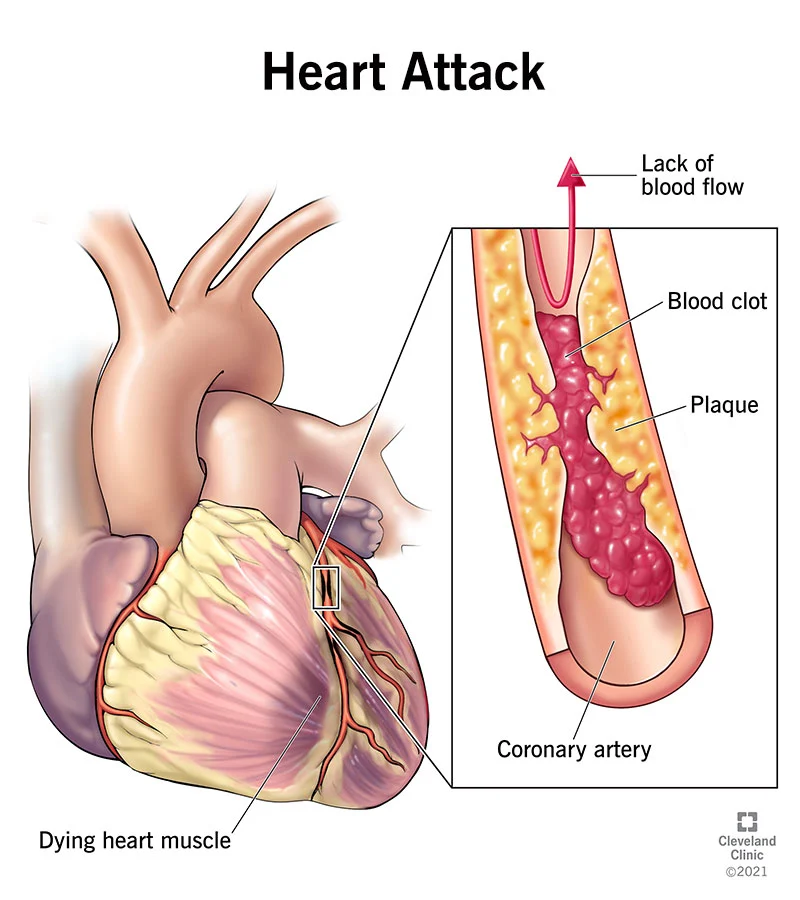

* Heart disease is the number 1 cause of death in the united states ​

* “One person dies every 34 seconds in the United States from cardiovascular disease.” – cdc.gov​

* Heart disease cost the United States about $229 billion each year from 2017 to 2019, and is increasing ​

###Factors that increase the risk of a heart attack
>* Age: An increase in age usually increasces the chance of heart attack in both men and women

>* Sex: Usally does not play an important factor as much dicating when the chances of heart attack is more prevelant

>* Family History: Patients with family history of heart attack are at greater risk for heart attacks

>* Life style: People with poor diet and exercise are often at a higher risk for heart illness.

>* Other illness: Patients who display other sickness such as anemia and angina are often at a higer risk for heart attacks

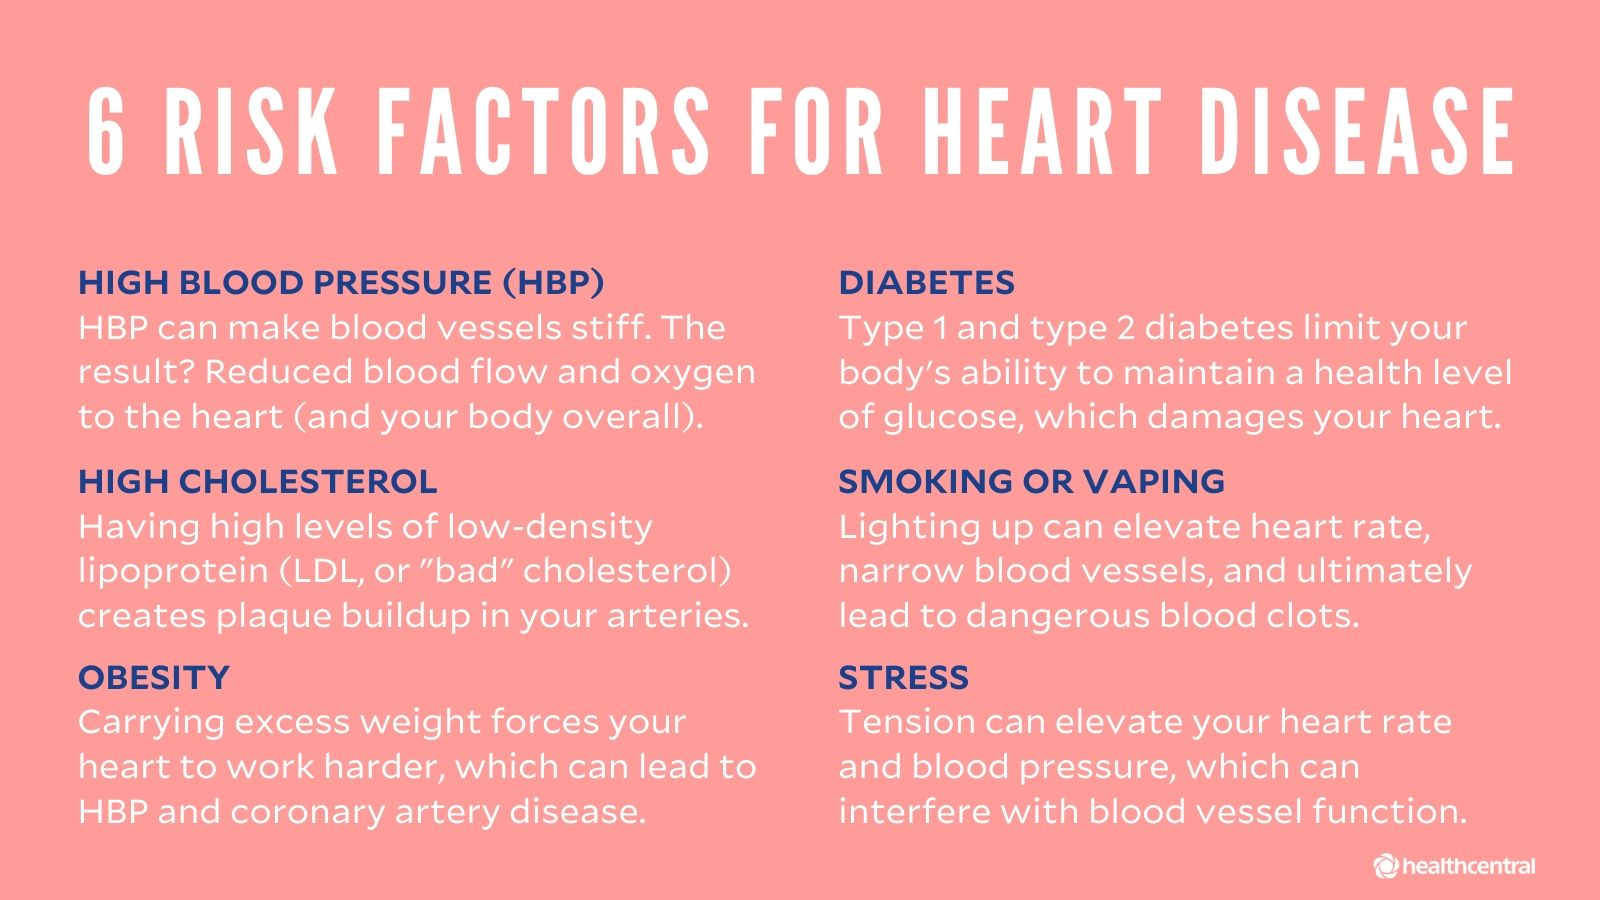
https://www.healthcentral.com/condition/heart-disease






### Significance of heart attacks
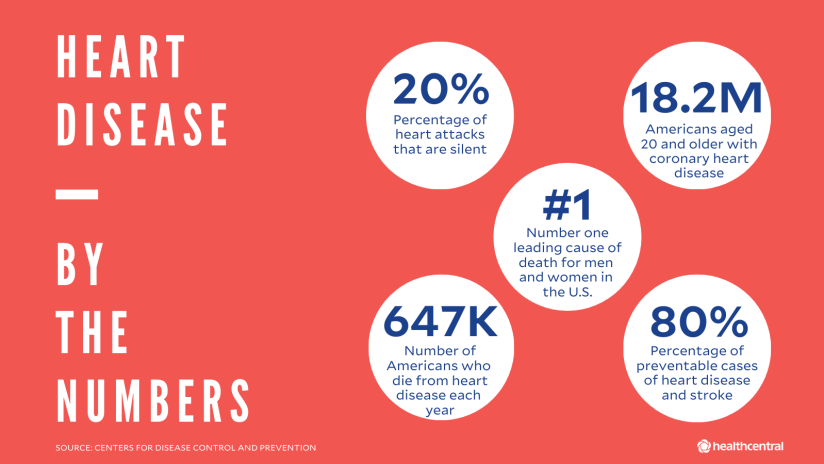

https://www.healthcentral.com/condition/heart-disease

>* Since heart attack is the number one cause of death for the entire poulation of the United States it is very important to diagnose and detect early

## Data set

### Variables
* Age : Age of the patient

* Sex : Sex of the patient

* exang: exercise induced angina (1 = yes; 0 = no)


* ca: number of major vessels (0-3)

* cp : Chest Pain type chest pain type

>> Value 1: typical angina
  
>> Value 2: atypical angina
  
>> Value 3: non-anginal pain
  
>>  Value 4: asymptomatic
  
* trtbps : resting blood pressure (in mm Hg)



* chol : cholestoral in mg/dl fetched via BMI sensor



* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)



* rest_ecg : resting electrocardiographic results



>> Value 0: normal

>> Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation   or depression of > 0.05 mV)

>> Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* thalach : maximum heart rate achieved

*  Target

>> 0 = less chance of heart attack

>> 1= more chance of heart attack





##Data Pre Analysis

###Installing Pacakages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
import plotly.express as px

###Importing Data

In [ ]:
#please select the heart.csv file attached to the document
from google.colab import files
uploaded = files.upload()


In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###Understanding the shape of data

In [ ]:
print("The shape of the data is:",df.shape)

The shape of the data is: (303, 14)


There are 303 and data points and 13 features, so not much feature selection or data maniuplation is required .

> Indented block



###Understanding the data variance

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


 Looking at the data it appears that there is a mix between continuous and categorical

>>Catogroical Data: sex, exng, caa, cp, fbs, restecg, slp, thall

>>Continuous data : age, trtbps, chol, thalachh, oldpeak



##Data Preanalysis

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

* There appears to be no missing data values

## Data Analysis

###Output Bias
> Checking the difference in counts for each of the two classes

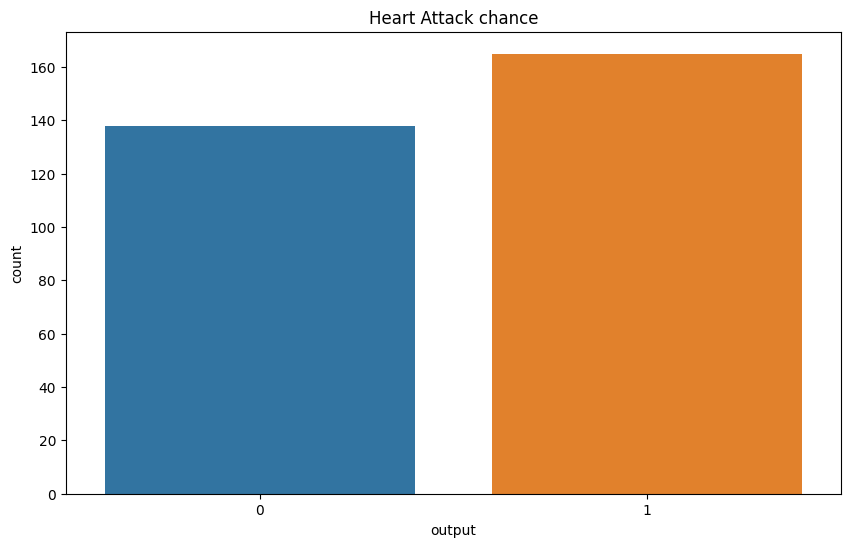

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'output')
plt.title("Heart Attack chance")
plt.show()

> There appears to be no inherent bias between the classes with near 50-50 split between a chance of heart attack and not having a chance of heart attack

### Categorical Data Analysis

Text(0.5, 1.0, 'Thalium stress result')

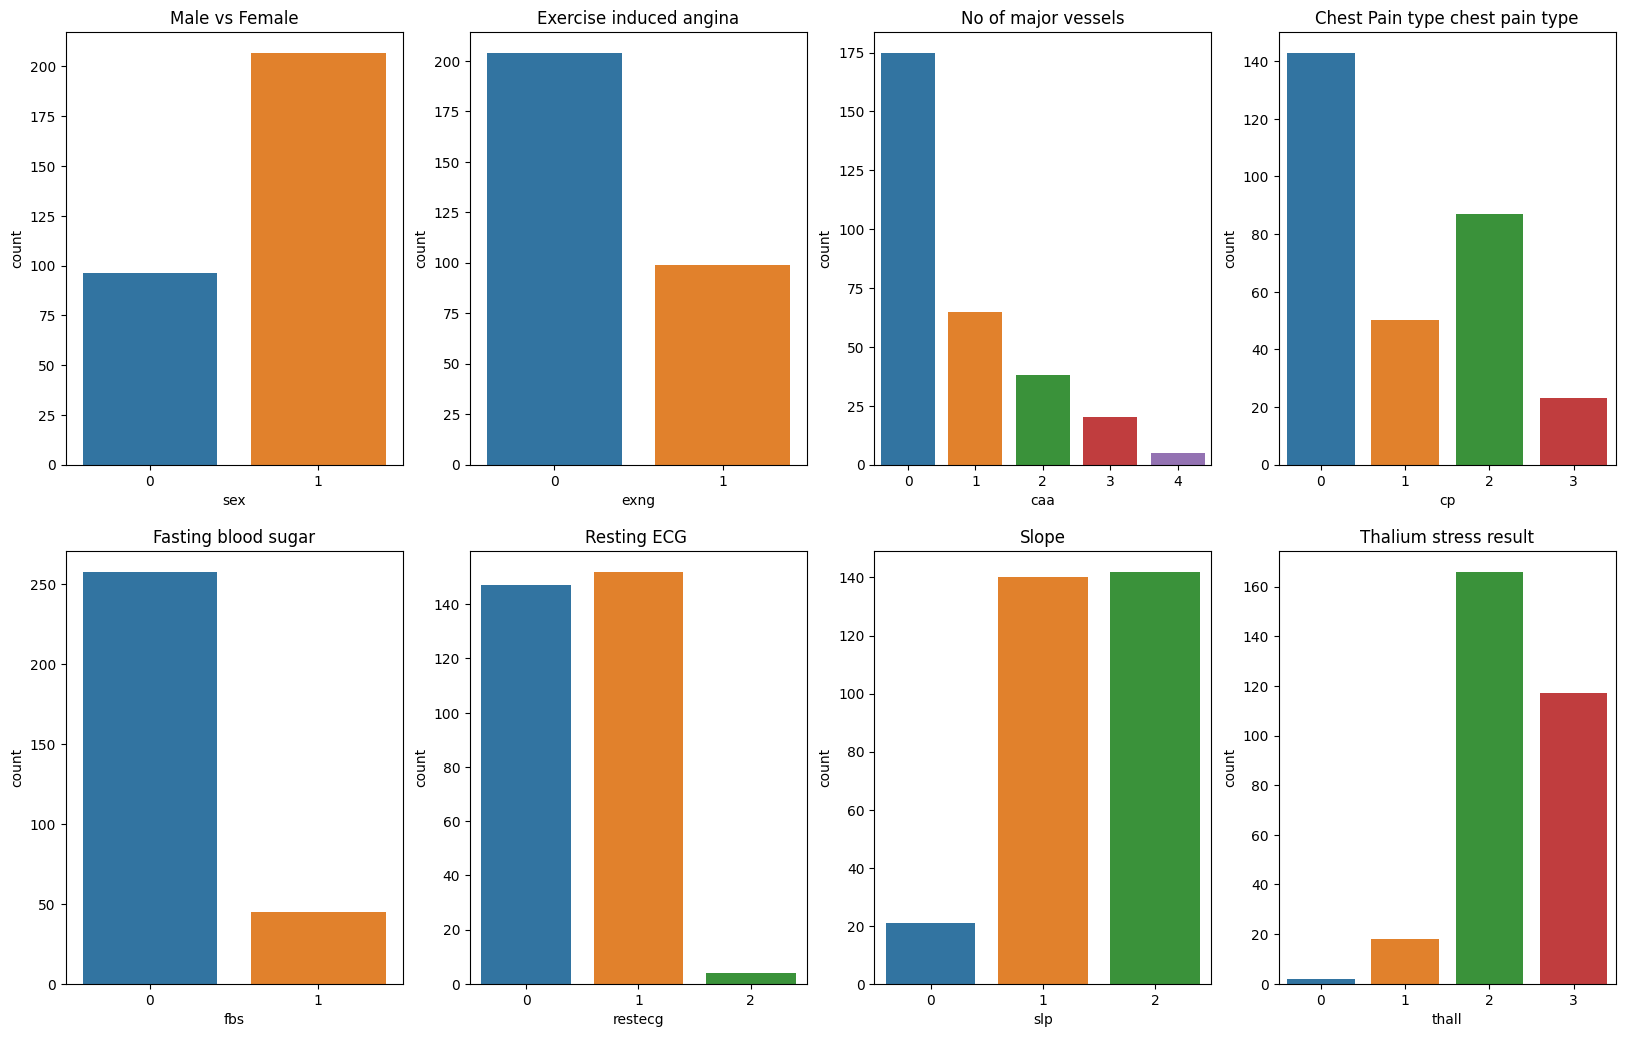

In [ ]:
figure, axes = plt.subplots(2, 4,figsize=(20, 12.361))
# plotting all categorical variables

sns.countplot(data = df, x = 'sex',ax =axes[0,0])
axes[0,0].set_title('Male vs Female')

sns.countplot(data = df,x = 'exng',ax =axes[0,1])
axes[0,1].set_title('Exercise induced angina')

sns.countplot(data = df, x = 'caa',ax =axes[0,2])
axes[0,2].set_title('No of major vessels')

sns.countplot(data = df, x = 'cp',ax =axes[0,3])
axes[0,3].set_title('Chest Pain type chest pain type')

sns.countplot(data = df, x = 'fbs',ax =axes[1,0])
axes[1,0].set_title('Fasting blood sugar')

sns.countplot(data = df, x = 'restecg',ax =axes[1,1])
axes[1,1].set_title('Resting ECG ')

sns.countplot(data = df, x = 'slp',ax =axes[1,2])
axes[1,2].set_title('Slope')

sns.countplot(data = df, x = 'thall',ax =axes[1,3])
axes[1,3].set_title('Thalium stress result')



Notes
* Sex:
>> There seems to be nearly twice as much females compared to males, however more analysis needs to be done in order to determine if this class bias needs to be adressed

* Exercise induced Angina:
>> Once again there is a class imbalance, this is very important since induced angina is often indicative of a weak heart

*  No of major vessels:
>> There is yet again a class imbalance, there isn't much information on what the no of major vessels mean.

* Chest Pain Type:
>> There is some class imbalance, to check if one type of heart pain has more influence on the output

* Fasting blood sugar:
>> A massive class imbalance , checking in relation to output would help determine if this plays a role in heart failure.

* Resting ECG:
>> There is no data values for class 2, using feature selection will help determine if class has an impact on heart attack or if ECG can be elminated.

* Thalium stress result:
>> Another variable with class imbalance

###Continuous Data Analysis

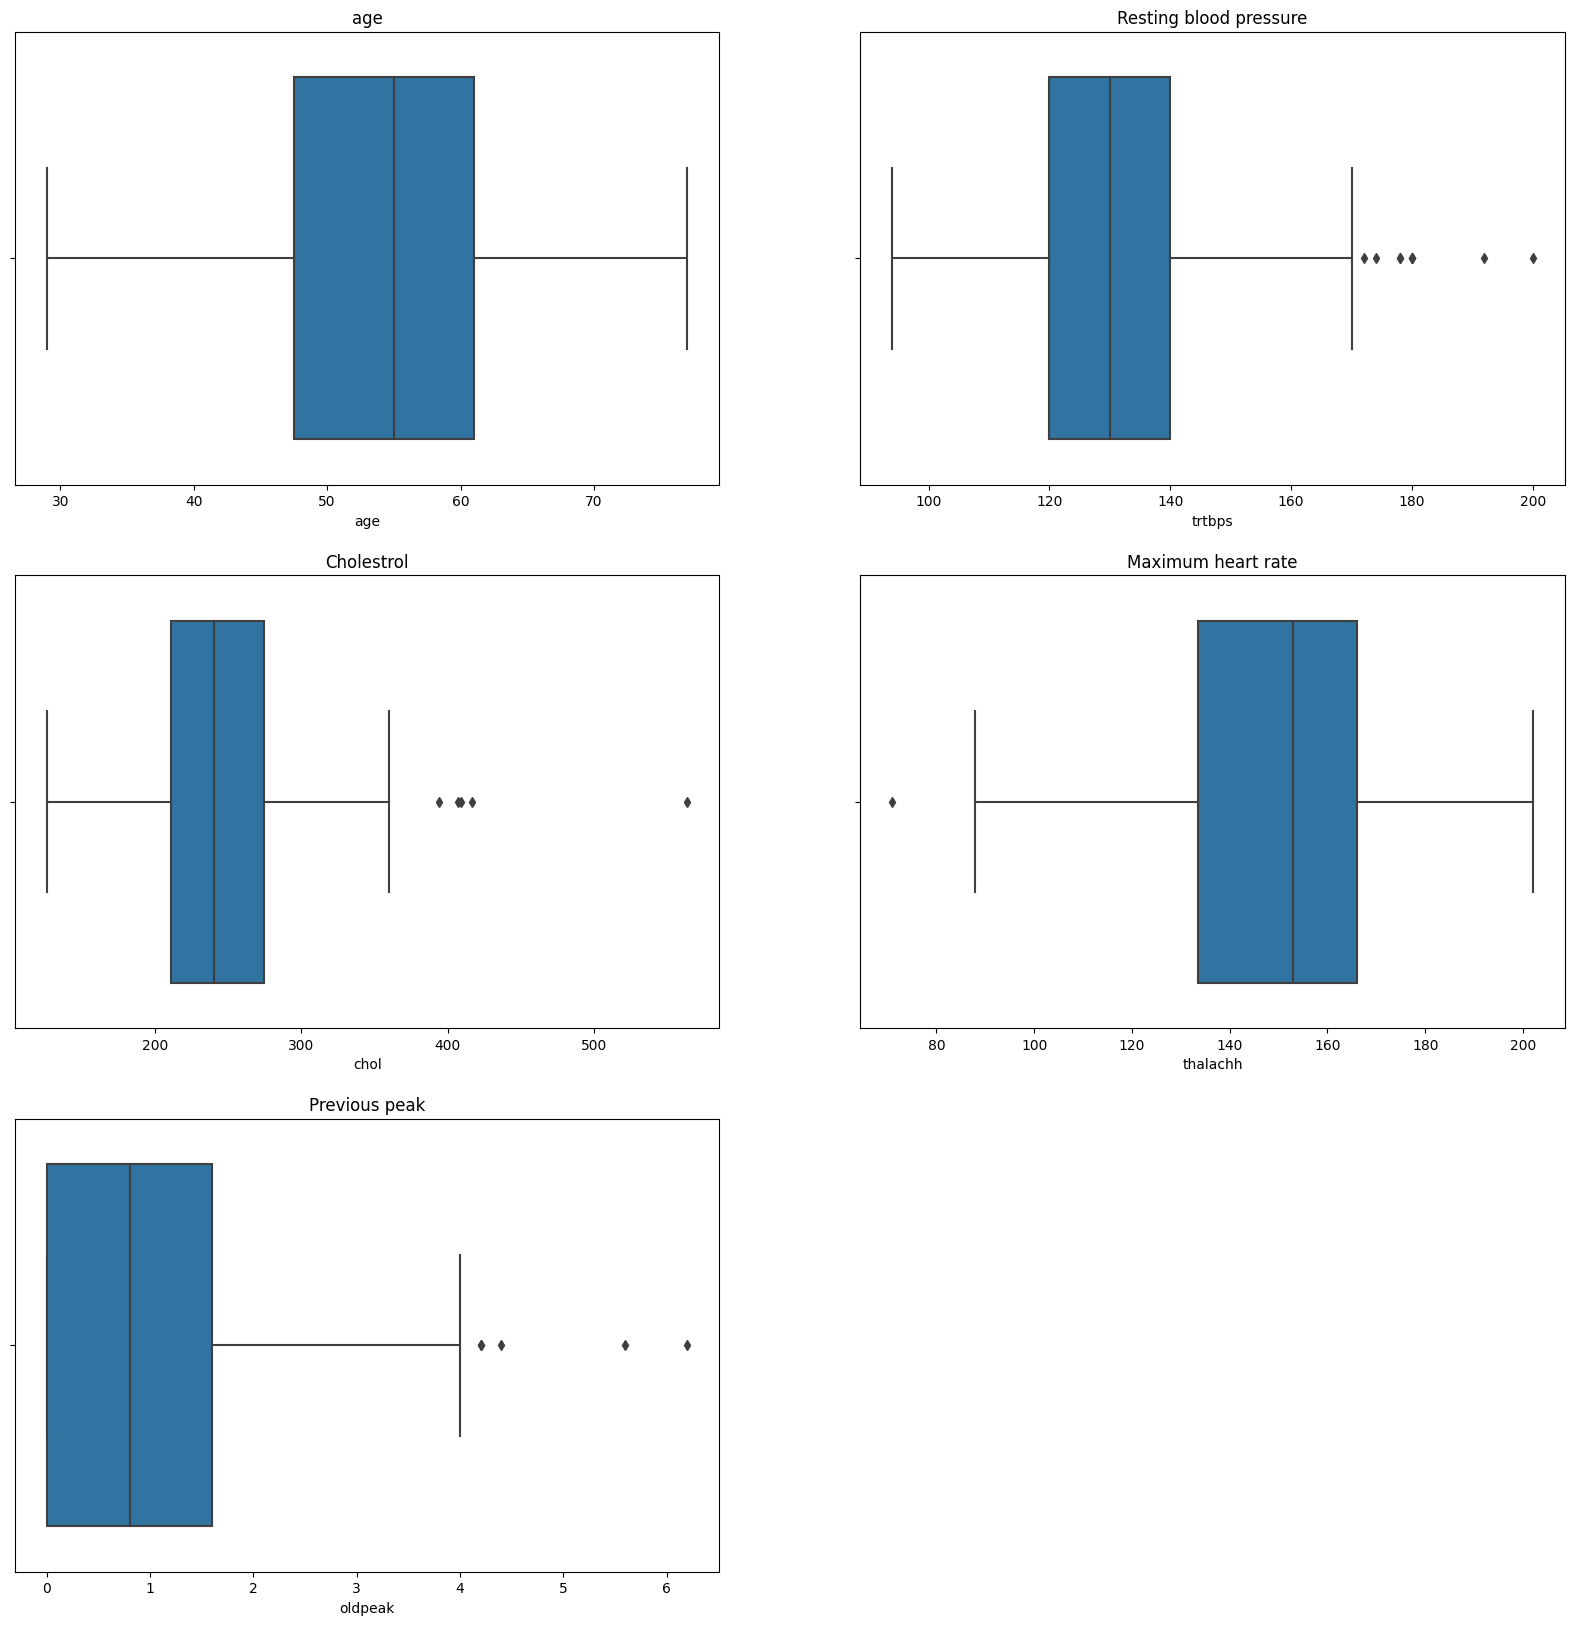

In [ ]:
fig,axes = plt.subplots(3, 2,figsize=(20, 20))
sns.boxplot(data = df, x = 'age',ax =axes[0,0])
axes[0,0].set_title('age')

sns.boxplot(data = df ,x = 'trtbps',ax =axes[0,1])
axes[0,1].set_title('Resting blood pressure')

sns.boxplot(data = df, x ='chol',ax =axes[1,0])
axes[1,0].set_title('Cholestrol')

sns.boxplot(data = df, x = 'thalachh',ax =axes[1,1])
axes[1,1].set_title('Maximum heart rate')

sns.boxplot(data = df, x = 'oldpeak',ax =axes[2,0])
axes[2,0].set_title('Previous peak')

fig.delaxes(axes[2][1])

Notes:
* Age:
>> Has no outliers, and the median age seems to be around 55 years old
* Resting Blood pressure, Cholestrol , Previous Peak :
>> Has few outliers, but it is imporant to check if these outliers have any impact on the chance of having a heart attack


###Splitting continuous and categorical data

In [ ]:
categorical  = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous = ["age","trtbps","chol","thalachh","oldpeak"]
target = ["output"]

Correlation Plot

In [ ]:
px.imshow(df.corr(),title="Correlation Plot")

###Corelation map

<Figure size 1500x1500 with 0 Axes>

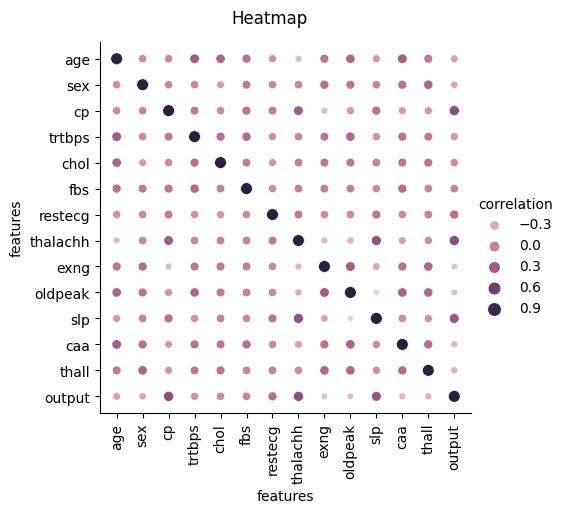

In [ ]:
fig = plt.figure(figsize=(15,15))
corr_mat = df.corr().stack().reset_index(name="correlation")
map= sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation")
map.set(xlabel="features", ylabel="features", aspect="equal")
map.fig.suptitle('Heatmap')

for label in map.ax.get_xticklabels():
    label.set_rotation(90)

plt.show()

Notes:
* It appears that Chest pain type, Resting Ecg, Thalium test, and Slope have higher corelation with output.

###Mapping features in relation to output

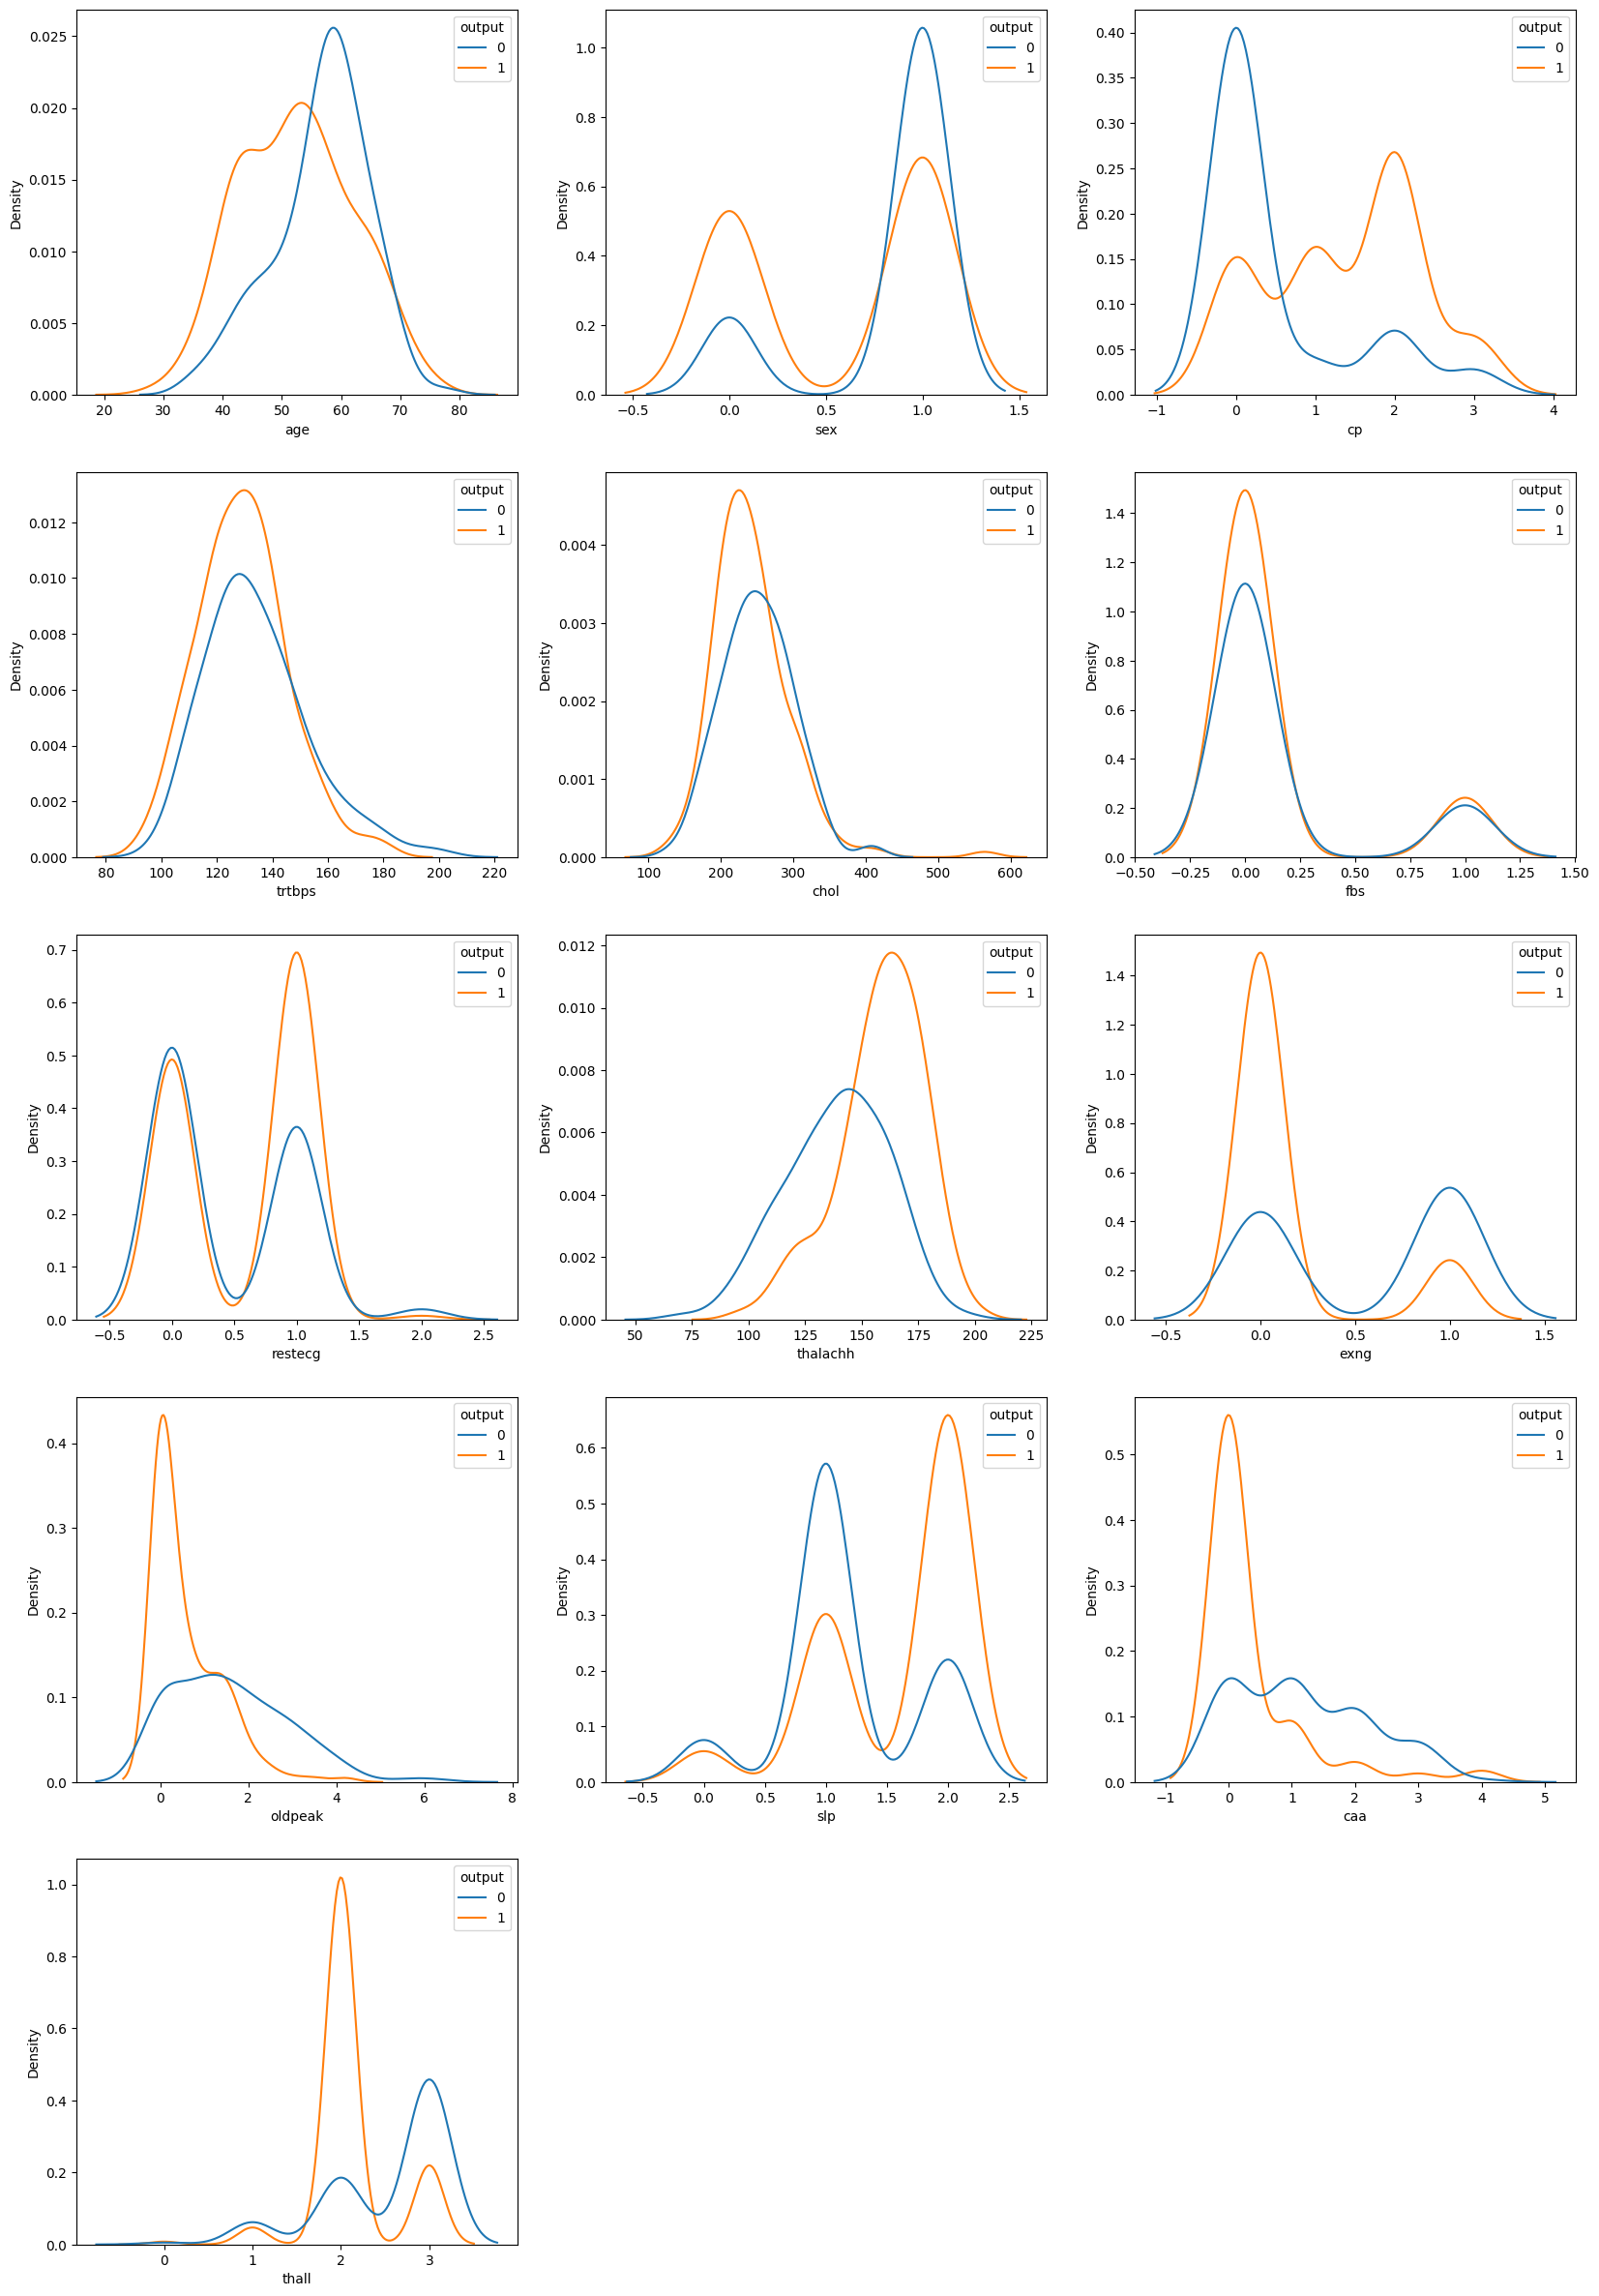

In [ ]:
fig,axes = plt.subplots(5, 3,figsize=(20, 30))

sns.kdeplot(data=df, x='age',hue="output",ax = axes[0,0])

sns.kdeplot(data=df, x='sex',hue="output",ax = axes[0,1])

sns.kdeplot(data=df, x='cp',hue="output",ax = axes[0,2])

sns.kdeplot(data=df, x='trtbps',hue="output",ax = axes[1,0])

sns.kdeplot(data=df, x='chol',hue="output",ax = axes[1,1])

sns.kdeplot(data=df, x='fbs',hue="output",ax = axes[1,2])

sns.kdeplot(data=df, x='restecg',hue="output",ax = axes[2,0])

sns.kdeplot(data=df, x='thalachh',hue="output",ax = axes[2,1])

sns.kdeplot(data=df, x='exng',hue="output",ax = axes[2,2])

sns.kdeplot(data=df, x='oldpeak',hue="output",ax = axes[3,0])

sns.kdeplot(data=df, x='slp',hue="output",ax = axes[3,1])

sns.kdeplot(data=df, x='caa',hue="output",ax = axes[3,2])

sns.kdeplot(data=df, x='thall',hue="output",ax = axes[4,0])

fig.delaxes(axes[4][1])
fig.delaxes(axes[4][2])




Notes
* Age:
> Does not seem to have an impact on the output
* Sex:
>Sex assosiated with value 0 seems to have a higher chance of heart attack
* Chest Pain Type (cp):
> Chest pain type 1 and 2 exhihibit a higher chance of heart attack
* Resting Blood pressure (trtbps):
> Does not have an impact
* Cholestrol (chol):
> Patients with cholestral around 200 seem to be at a higher risk
* Fasting blood sugar (fbs):
> Not a distinguishable attribute to output
* Resting ECG (restecg):
> Rest ECG of type 1 has higher chance of a heart attack
* Maximum heart rate (thalachh):
> Patients of maximum heart rate of 165 seem to be at a higher risk
* Exercise induced Angina(exang):
>Type 0 are at a higher risk of a heart attack
* Old peak:
> Old peak of 0 have a higher risk of heart attack
* Slope (slp):
>Patients with slope type 2 have a higher risk of a heart attack
* Number of major vessels(caa):
> Patients with 2 major vessels affected have a higher chance of a heart attack
* Thalium stress result (thal):
> Patients with type 2 results have a higher chance of heart attack

* Another important observation is that the outliers for each of the classes does not affect the output





###UMAP visualization

In [ ]:
#installing dependencies
!pip install umap-learn
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel
!pip install umap-learn[parametric_umap]

In [ ]:
#importing Packages
import umap
import umap.plot
from sklearn.datasets import load_digits
from umap.umap_ import UMAP



<Axes: >

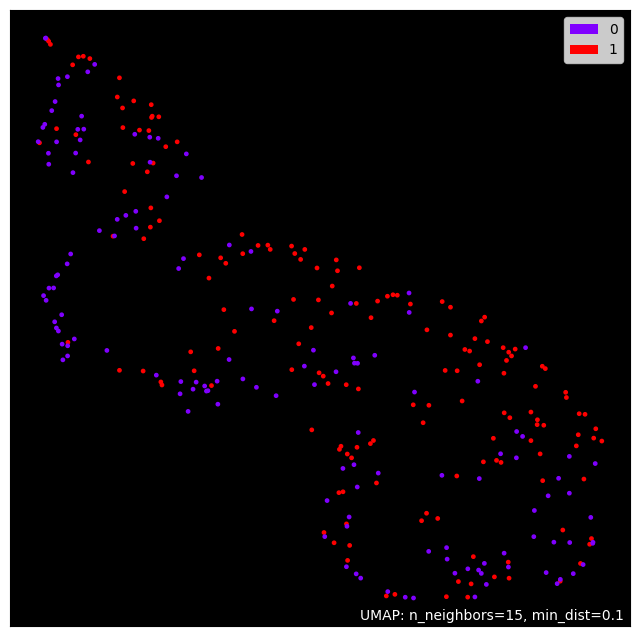

In [ ]:
X_train_umap = df.drop('output',axis=1)
y_train_umap = df['output']

mapper = UMAP().fit(X_train_umap)
umap.plot.points(mapper, labels=y_train_umap, theme='fire')

>There appears to be some overlap in data point, but some distinction  cab be observed between the two classificatoin

### 3d UMAP

In [ ]:
umap_3d = UMAP(n_components=3, init='random', random_state=0)

x_umap = umap_3d.fit_transform(X_train_umap)

umap_df = pd.DataFrame(x_umap)
train_y_sr = pd.Series(y_train_umap,name='label').astype(str)
print(type(x_umap))
new_df = pd.concat([umap_df,train_y_sr],axis=1)
fig = px.scatter_3d(
    new_df, x=0, y=1, z=2,
    color='label', labels={'color': 'number'}
)
fig.update_traces(marker_size=1.5)
fig.show()

<class 'numpy.ndarray'>


###TSNE Visualization

In [ ]:
from sklearn.manifold import TSNE

Creating TSNE plot

In [ ]:
X_train_tsne = df.drop('output',axis=1)
y_train_tsne = df['output']
tsne = TSNE(random_state=42).fit_transform(X_train_tsne)

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X_train_tsne)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.001s...
[t-SNE] Computed neighbors for 303 samples in 0.035s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 19.137188
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.803589
[t-SNE] KL divergence after 1000 iterations: 0.447794


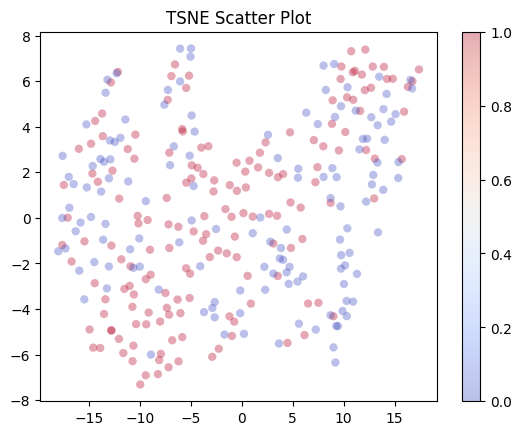

In [ ]:

plt.scatter(tsne_results[:,0],tsne_results[:,1], c = y_train_tsne,
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()


##Data preprocessing

###Handling values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Checking for missing data points

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

###Feature scaling and one hot encoding for catergorical variables

###Outlier Transformation

In [ ]:
dfc = df
dfc["age"]= np.log(dfc.age)
dfc["trtbps"]= np.log(dfc.trtbps)
dfc["chol"]= np.log(dfc.chol)
dfc["thalachh"]= np.log(dfc.thalachh)
print("---Log Transform performed---")

#Outliners again
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=dfc[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(dfc)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

---Log Transform performed---
Column age outliers = 3 => 0.99%
Column trtbps outliers = 7 => 2.31%
Column chol outliers = 4 => 1.32%
Column thalachh outliers = 7 => 2.31%
Column oldpeak outliers = 8 => 2.64%


importing packages for scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:


# Getting categorical and continuous variables from data frame
categorical = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous = ["age","trtbps","chol","thalachh","oldpeak"]

# One hot encoding

dfc = pd.get_dummies(dfc, columns = categorical, drop_first = True)

#Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
dfc[continuous] = scaler.fit_transform(dfc[continuous])

dfc.head()


,age,trtbps,chol,thalachh,oldpeak,output,sex_1,exng_1,caa_1,caa_2,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.828085,0.604312,0.462867,0.750307,0.370968,1,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,0.293798,0.460395,0.510567,0.937466,0.564516,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,0.407230,0.460395,0.370109,0.868008,0.225806,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.720427,0.351515,0.471605,0.896710,0.129032,1,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.736948,0.351515,0.732784,0.822396,0.096774,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
dfc.head()
dfc.shape

(303, 23)

Train/Test data split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dfc.drop(['output'],axis=1)
y = dfc[['output']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [ ]:
X_train

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
132,0.433059,0.351515,0.618976,0.817124,0.000000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
202,0.753061,0.647953,0.561605,0.471969,0.129032,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
196,0.527990,0.647953,0.456961,0.732491,0.580645,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
75,0.703480,0.510723,0.510567,0.811809,0.225806,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
176,0.784132,0.316453,0.453983,0.806450,0.225806,1,1,0,1,0,...,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.611606,0.558629,0.462867,0.822396,0.096774,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
71,0.631011,0.000000,0.444947,0.773341,0.000000,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
106,0.907729,0.729724,0.465796,0.628583,0.016129,1,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
270,0.527990,0.351515,0.507878,0.714186,0.129032,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


## Models for classification

Packages

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report,roc_auc_score
import graphviz
from sklearn import tree
from sklearn import datasets, metrics, model_selection
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,PrecisionRecallDisplay
from matplotlib.gridspec import GridSpec

Extracting feature names for a later use

In [ ]:
#Extracting feature names
feature_names = X.columns.to_list()
class_names = y.columns.to_list()


###Decision Tree

              precision    recall  f1-score   support

           0       0.68      0.72      0.70        29
           1       0.73      0.69      0.71        32

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.71      0.70      0.71        61



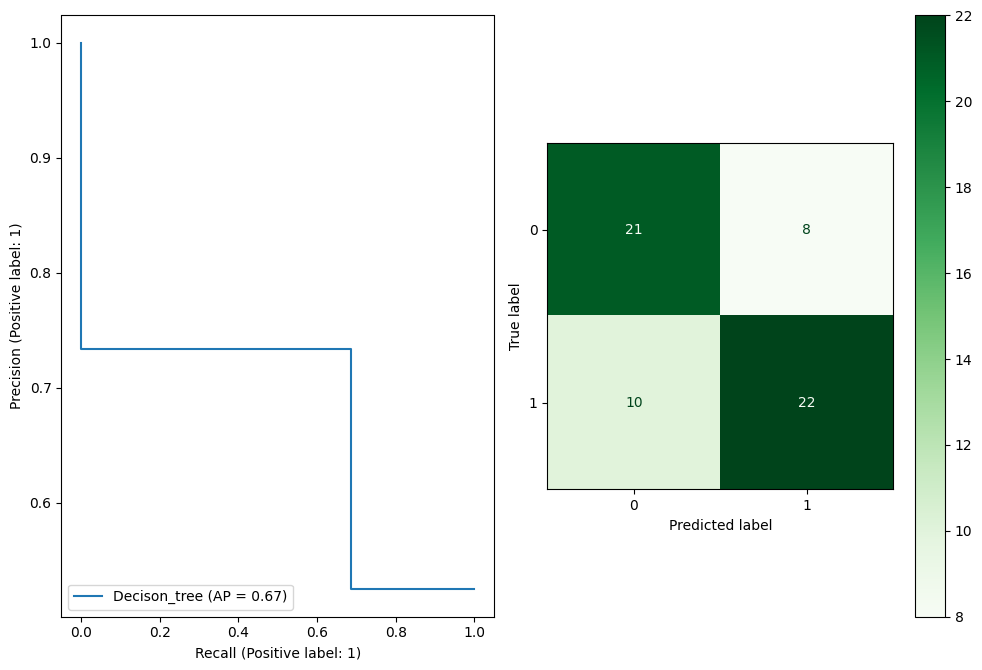

In [ ]:

#Model Creation
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

#Model Mertics
print(classification_report(y_test,y_pred))

# Creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm_p = ConfusionMatrixDisplay(confusion_matrix=cm)


#Creating a confusion matrix plot

fig = plt.figure(figsize=(10, 6.8),tight_layout=True)
gs = GridSpec(nrows=1, ncols=2)

# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_anchor('W')
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="Decison_tree",ax=ax0)
# Second axes
ax1 = fig.add_subplot(gs[0, 1])
cm_p.plot(cmap='Greens',ax =ax1)








In [ ]:
#Decison Tree Visualization
fig = plt.figure(figsize=(10, 10),dpi = 300)
plot_tree(dt,feature_names= feature_names , label='all', filled= True, proportion=True, rounded=True, precision=3)


> 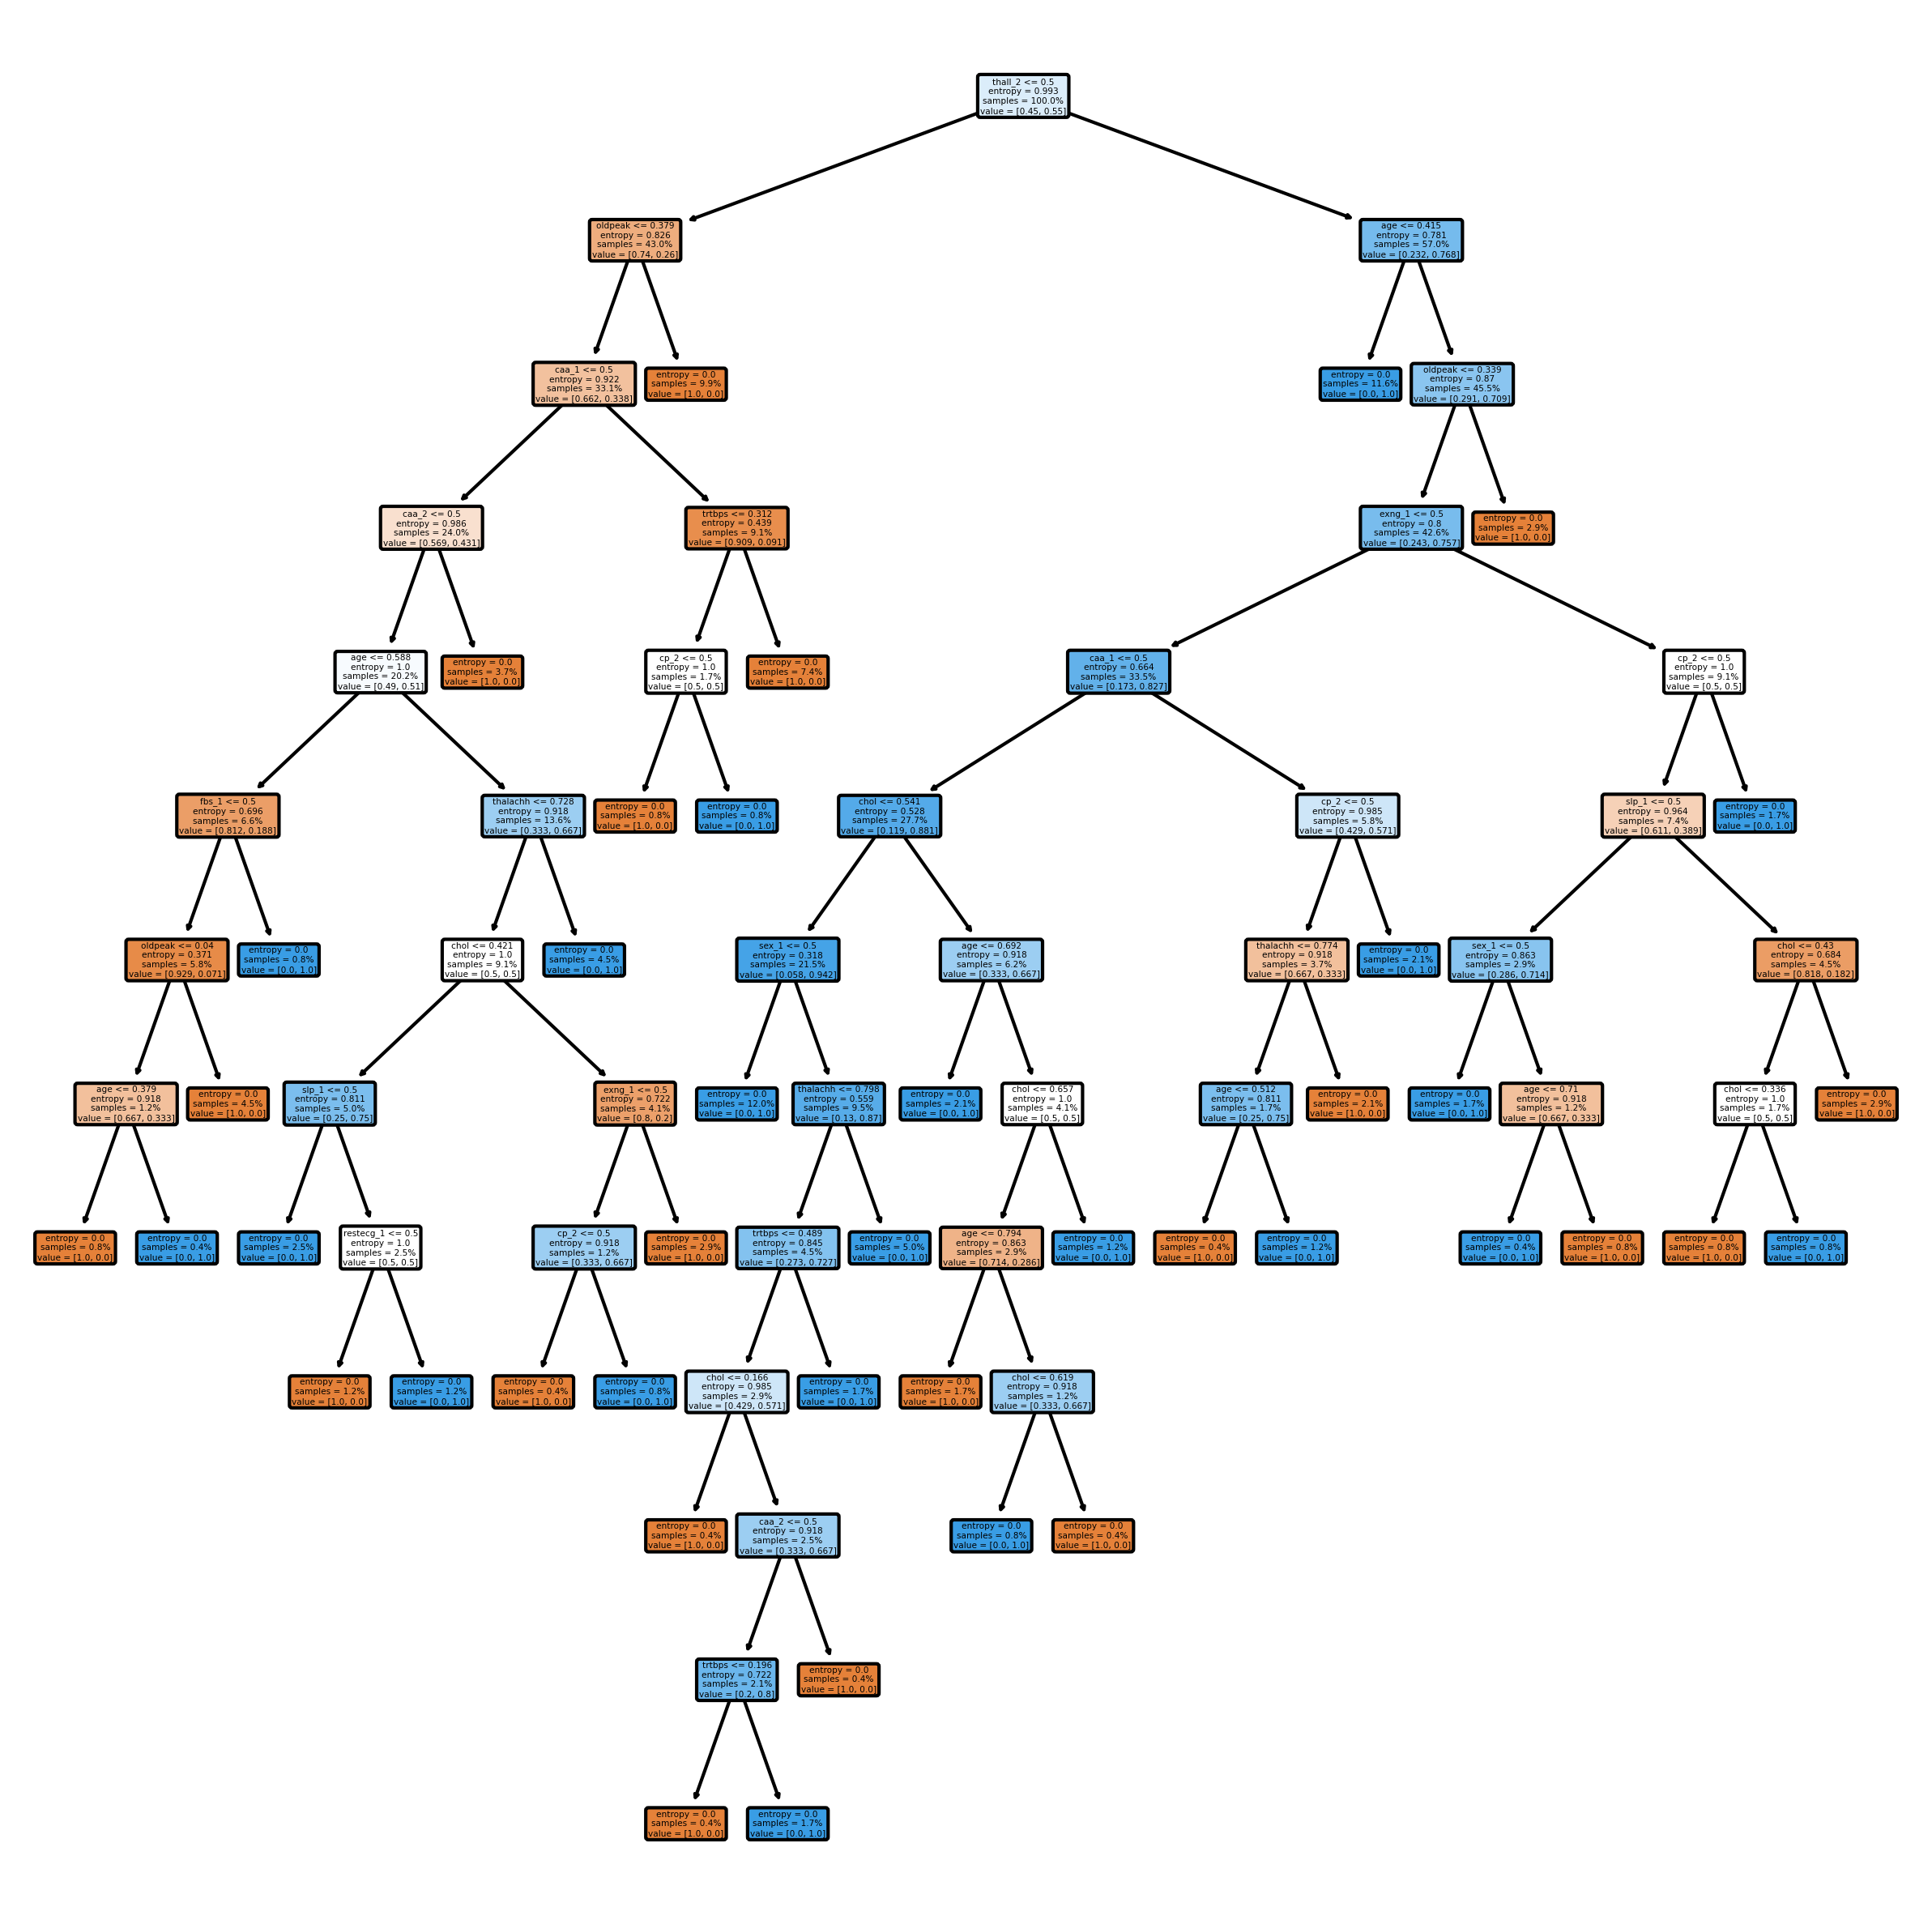

###Random Forest

<ipython-input-128-c7044b2f6853>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



The test accuracy score of Random Forest is: 70.49%

              precision    recall  f1-score   support

           0       0.68      0.72      0.70        29
           1       0.73      0.69      0.71        32

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.71      0.70      0.71        61



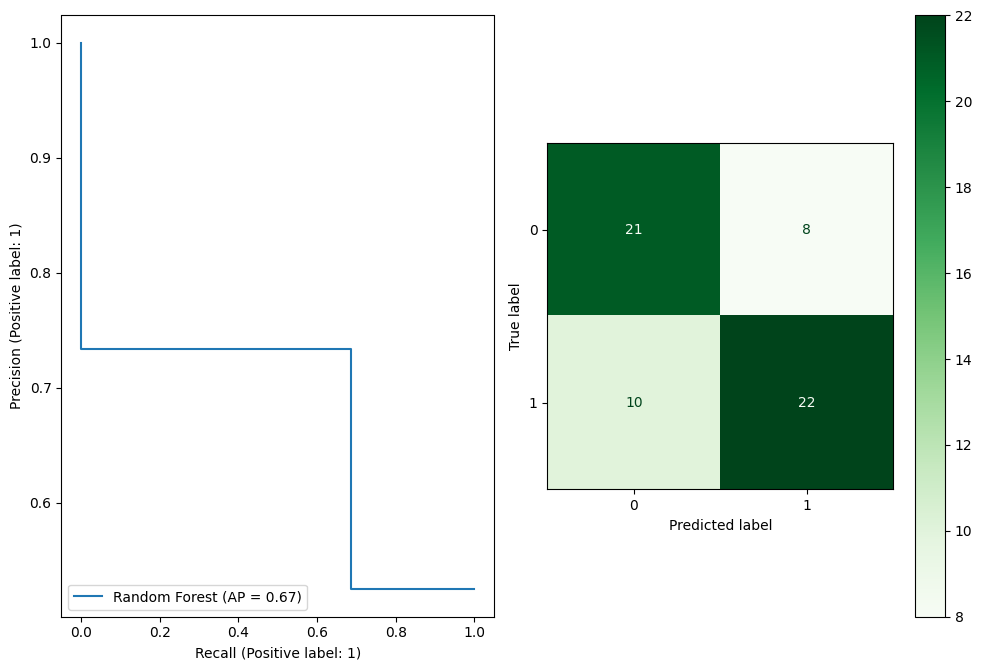

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = dt.predict(X_test)


print("The test accuracy score of Random Forest is: {:<.2f}%\n".format( accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test,y_pred))

# Creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm_p = ConfusionMatrixDisplay(confusion_matrix=cm)


#Creating a confusion matrix plot

fig = plt.figure(figsize=(10, 6.8),tight_layout=True)
gs = GridSpec(nrows=1, ncols=2)

# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_anchor('W')
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="Random Forest",ax=ax0)
# Second axes
ax1 = fig.add_subplot(gs[0, 1])
cm_p.plot(cmap='Greens',ax =ax1)







Feature Importance for random forest

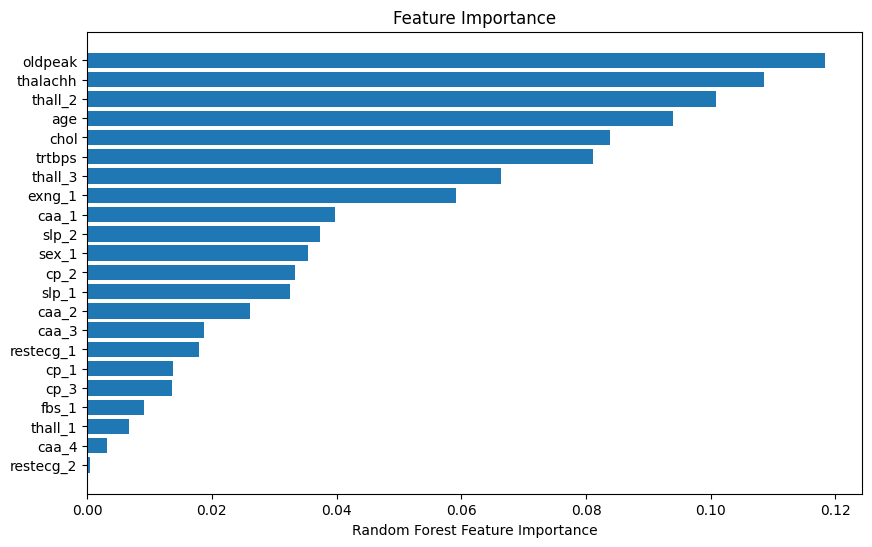

In [ ]:
#Plotting Feature Importance
plt.figure(figsize=(10,6))
importance = rfc.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_names[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

### Gradient Boost




/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



The test accuracy score of GradientBoostingClassifier is: 86.89% 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



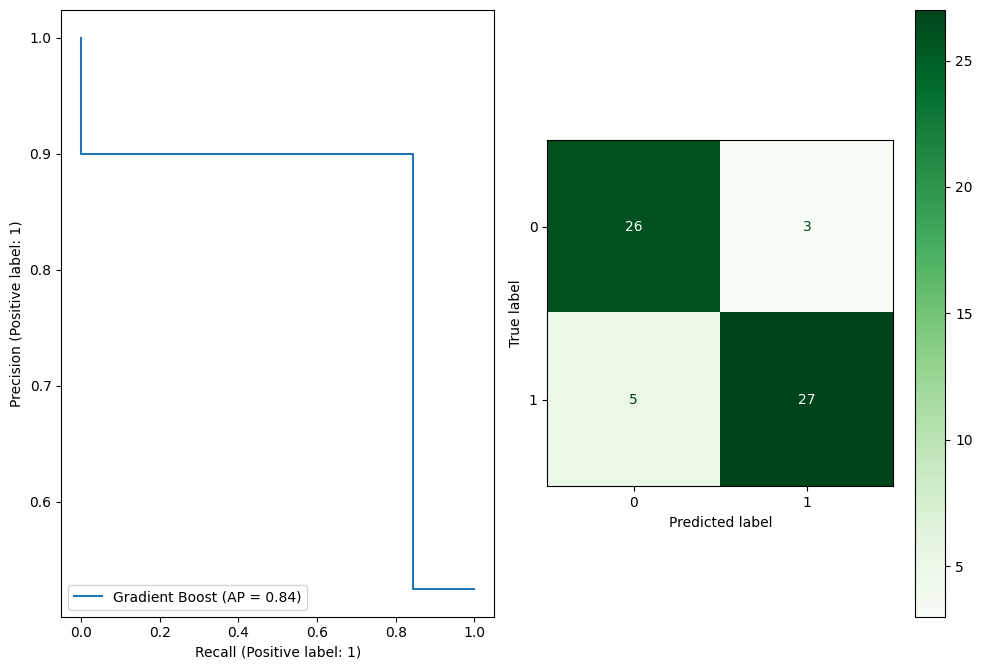

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of GradientBoostingClassifier is: {:<.2f}% \n".format( accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test,y_pred))

# Creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm_p = ConfusionMatrixDisplay(confusion_matrix=cm)


#Creating a confusion matrix plot

fig = plt.figure(figsize=(10, 6.8),tight_layout=True)
gs = GridSpec(nrows=1, ncols=2)

# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_anchor('W')
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="Gradient Boost",ax=ax0)
# Second axes
ax1 = fig.add_subplot(gs[0, 1])
cm_p.plot(cmap='Greens',ax =ax1)





###XG Boost

The test accuracy score of XGBoost is: 83.61% 

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



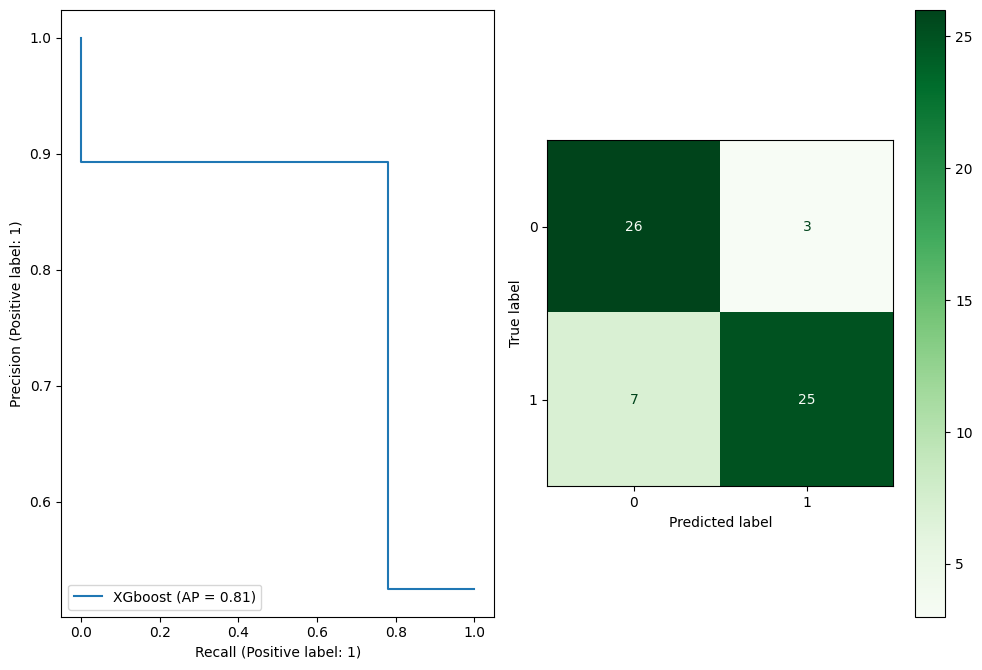

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree
import graphviz

#Model Creation
xg =XGBClassifier()
xg.fit(X_train,y_train)
y_pred= xg.predict(X_test)

#Model Mertics
print("The test accuracy score of XGBoost is: {:<.2f}% \n".format( accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test,y_pred))

# Creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm_p = ConfusionMatrixDisplay(confusion_matrix=cm)


#Creating a confusion matrix plot

fig = plt.figure(figsize=(10, 6.8),tight_layout=True)
gs = GridSpec(nrows=1, ncols=2)

# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_anchor('W')
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="XGboost",ax=ax0)
# Second axes
ax1 = fig.add_subplot(gs[0, 1])
cm_p.plot(cmap='Greens',ax =ax1)





Visualizing XG_boost

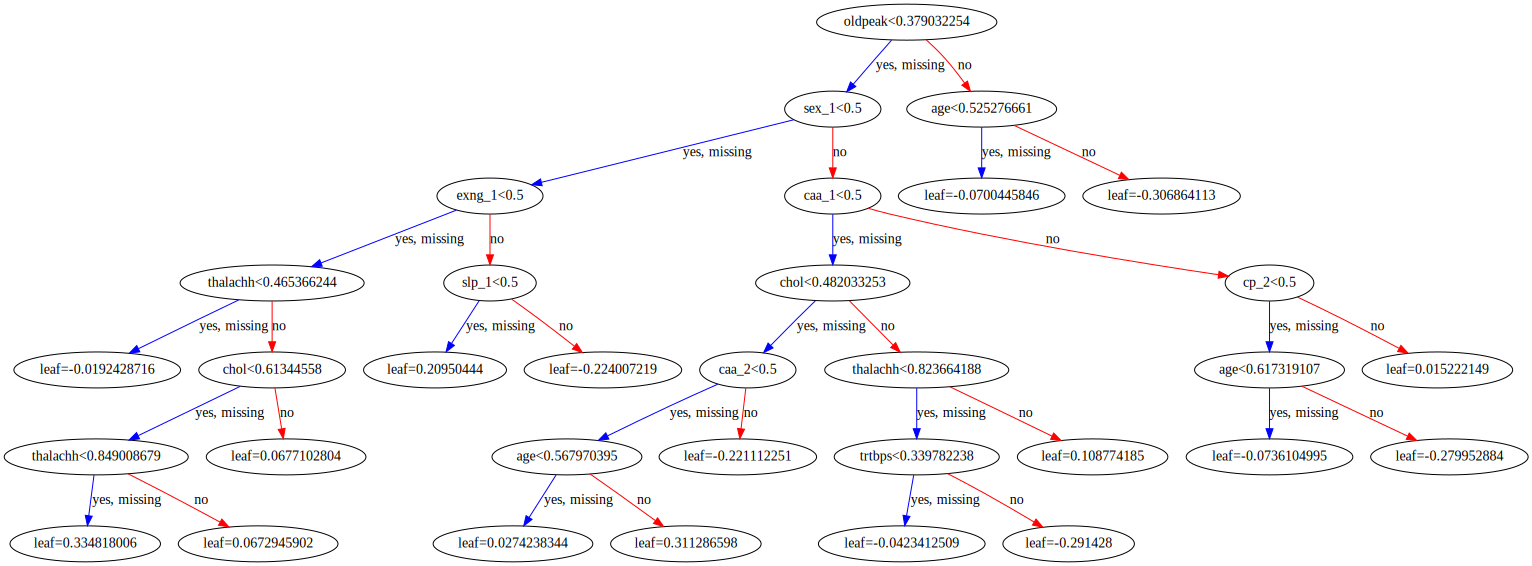

<Figure size 10800x6480 with 0 Axes>

In [ ]:
#Model Plotting
fig = plt.figure(figsize=(10, 6),dpi = 1080)
xgb.to_graphviz(xg, num_trees=5)


Feature Importance using xgboost

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

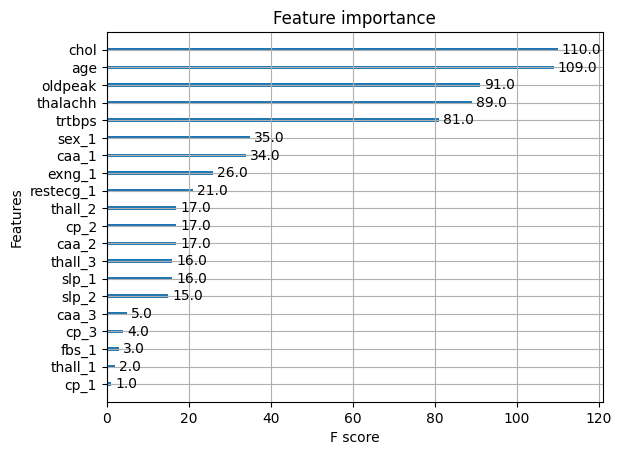

In [ ]:
xgb.plot_importance(xg)

###Support Vector machines

Linear SVM

The test accuracy score of Linaer SVM is: 88.52% 

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



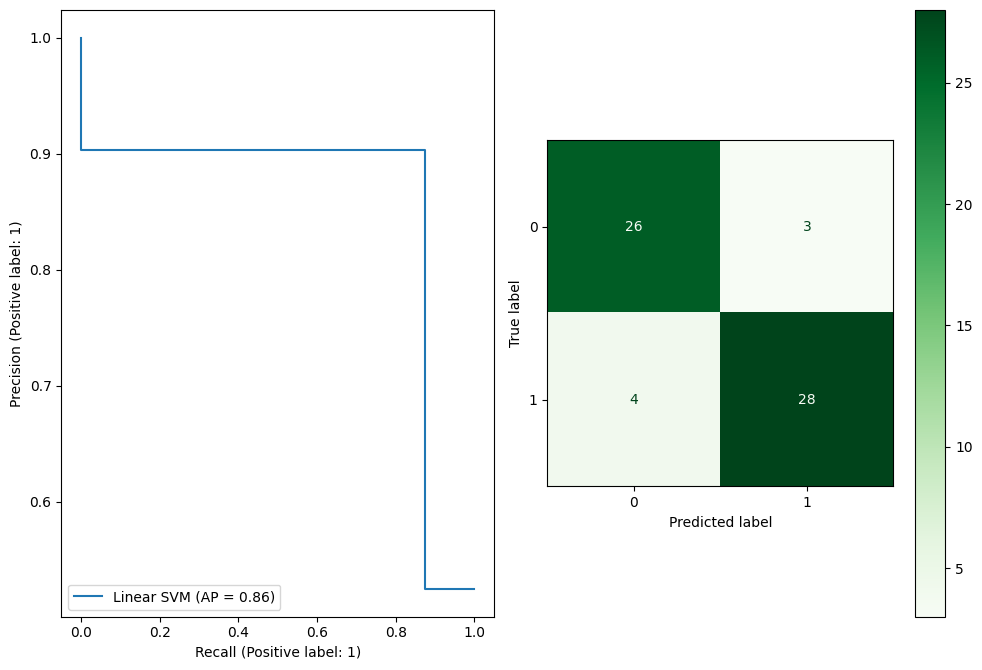

In [ ]:
from sklearn.svm import SVC

svm=SVC(kernel="linear")
svm.fit(X_train,y_train)
y_pred= svm.predict(X_test)

print("The test accuracy score of Linaer SVM is: {:<.2f}% \n".format( accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test,y_pred))

# Creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm_p = ConfusionMatrixDisplay(confusion_matrix=cm)


#Creating a confusion matrix plot

fig = plt.figure(figsize=(10, 6.8),tight_layout=True)
gs = GridSpec(nrows=1, ncols=2)

# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_anchor('W')
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="Linear SVM",ax=ax0)
# Second axes
ax1 = fig.add_subplot(gs[0, 1])
cm_p.plot(cmap='Greens',ax =ax1)





Sigmoidal Kernal based SVM

The test accuracy score of Sigmoidal Kernal based SVM is: 81.97% 

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.92      0.72      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



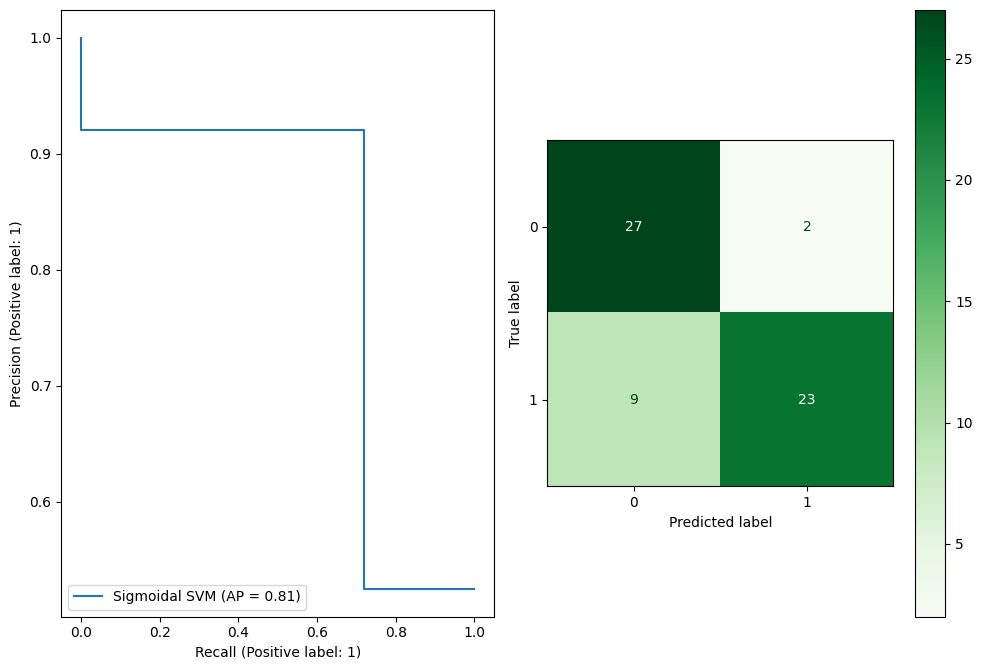

In [ ]:
svm=SVC(kernel="sigmoid")
svm.fit(X_train,y_train)
y_pred= svm.predict(X_test)

print("The test accuracy score of Sigmoidal Kernal based SVM is: {:<.2f}% \n".format( accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test,y_pred))

# Creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm_p = ConfusionMatrixDisplay(confusion_matrix=cm)


#Creating a confusion matrix plot

fig = plt.figure(figsize=(10, 6.8),tight_layout=True)
gs = GridSpec(nrows=1, ncols=2)

# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_anchor('W')
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="Sigmoidal SVM",ax=ax0)
# Second axes
ax1 = fig.add_subplot(gs[0, 1])
cm_p.plot(cmap='Greens',ax =ax1)




RBF kernal based SVM

The test accuracy score of rbf Kernal based SVM is: 85.25% 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



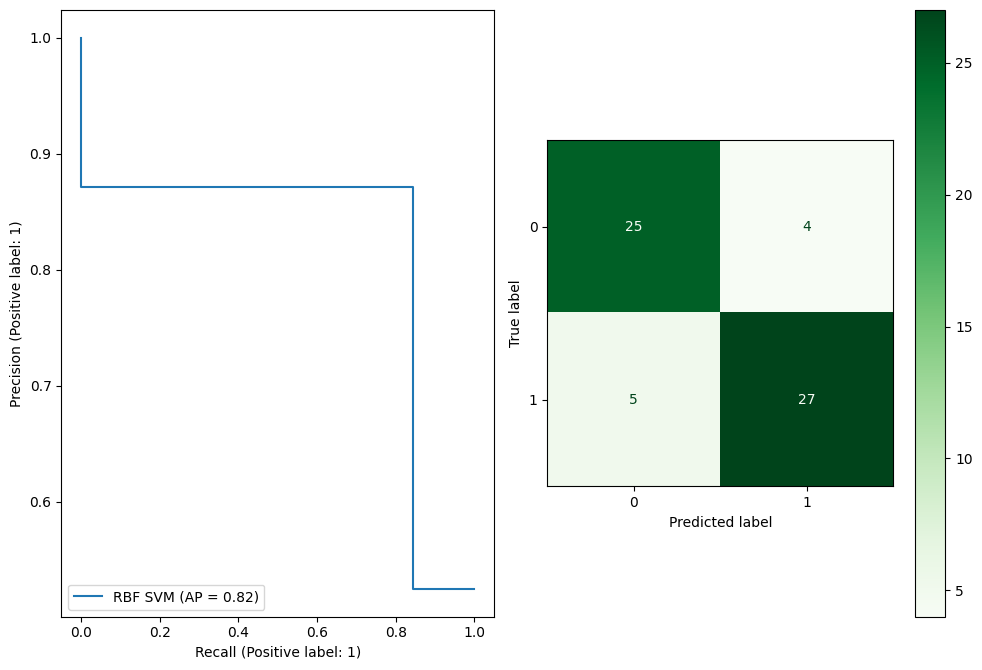

In [ ]:
svm=SVC(kernel="rbf")
svm.fit(X_train,y_train)
y_pred= svm.predict(X_test)

print("The test accuracy score of rbf Kernal based SVM is: {:<.2f}% \n".format( accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test,y_pred))

# Creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm_p = ConfusionMatrixDisplay(confusion_matrix=cm)


#Creating a confusion matrix plot

fig = plt.figure(figsize=(10, 6.8),tight_layout=True)
gs = GridSpec(nrows=1, ncols=2)

# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_anchor('W')
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="RBF SVM",ax=ax0)
# Second axes
ax1 = fig.add_subplot(gs[0, 1])
cm_p.plot(cmap='Greens',ax =ax1)




Hyperparameter Tuned SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
svm = SVC()


parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00006, 0.0001,0.0006,0.006,0.003,0.01,0.06,0.1,0.6,1,6]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

# Creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm_p = ConfusionMatrixDisplay(confusion_matrix=cm)


#Creating a confusion matrix plot

fig = plt.figure(figsize=(10, 6.8),tight_layout=True)
gs = GridSpec(nrows=1, ncols=2)

# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_anchor('W')
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="Tuned SVM",ax=ax0)
# Second axes
ax1 = fig.add_subplot(gs[0, 1])
cm_p.plot(cmap='Greens',ax =ax1)





              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61




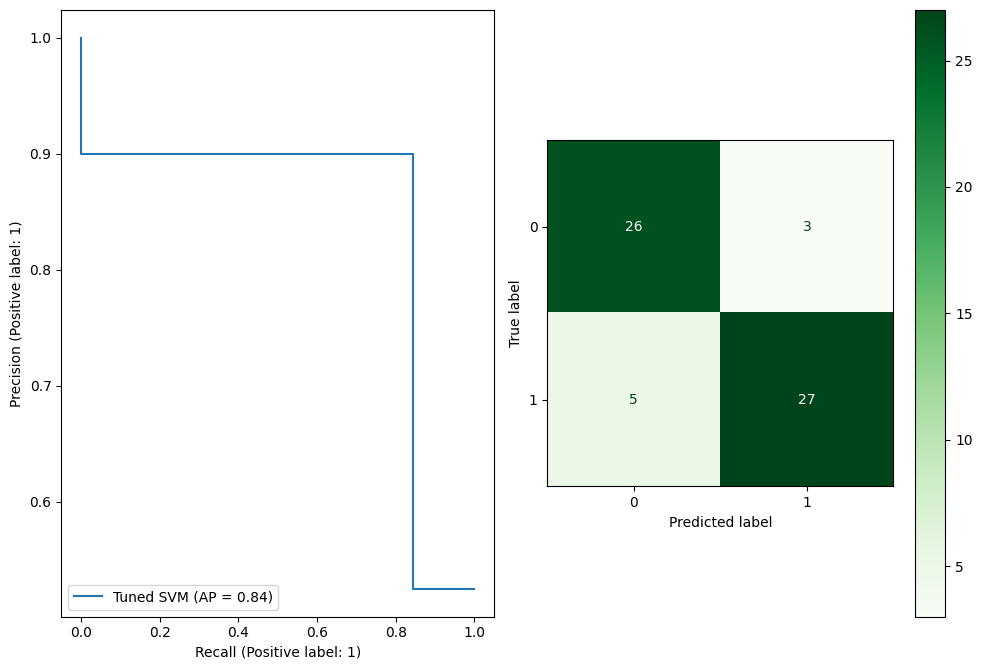

The best params are : {'C': 4, 'gamma': 0.01}

The best score is   : 83.46 %

The test accuracy score of SVM after hyper-parameter tuning is  86.88 %

###Logistic Regression

The test accuracy score of Logistic Regression is: 88.52% 

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



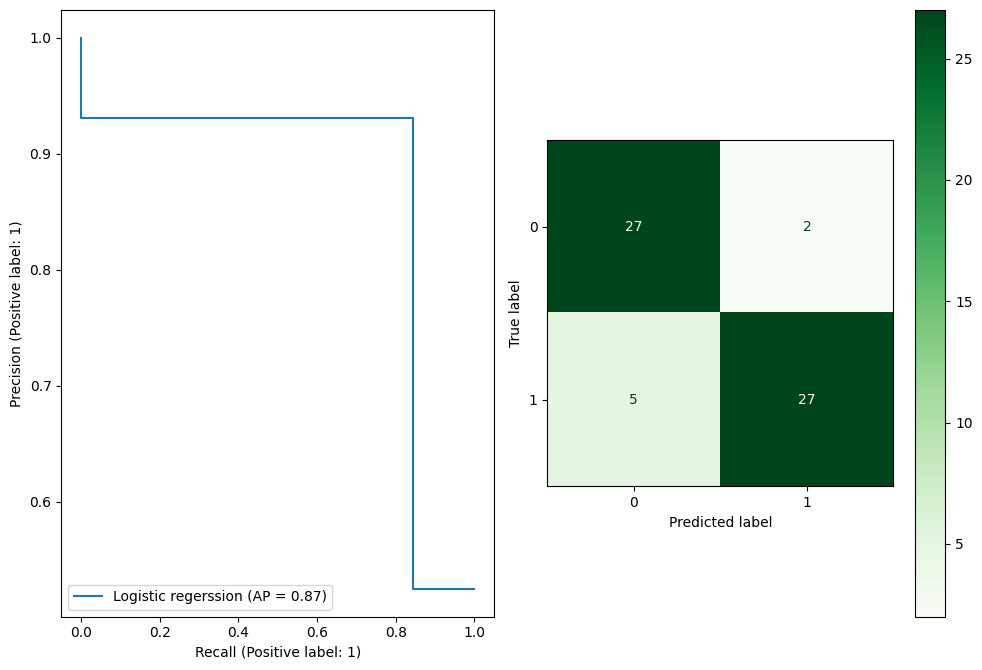

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict_proba(X_test)
y_pred = np.argmax(y_pred,axis=1)

print("The test accuracy score of Logistic Regression is: {:<.2f}% \n".format( accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test,y_pred))

# Creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm_p = ConfusionMatrixDisplay(confusion_matrix=cm)


#Creating a confusion matrix plot

fig = plt.figure(figsize=(10, 6.8),tight_layout=True)
gs = GridSpec(nrows=1, ncols=2)

# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_anchor('W')
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="Logistic regerssion",ax=ax0)
# Second axes
ax1 = fig.add_subplot(gs[0, 1])
cm_p.plot(cmap='Greens',ax =ax1)


### K-nearest neigbhours

The test accuracy score of Logistic Regression is: 83.61% 

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



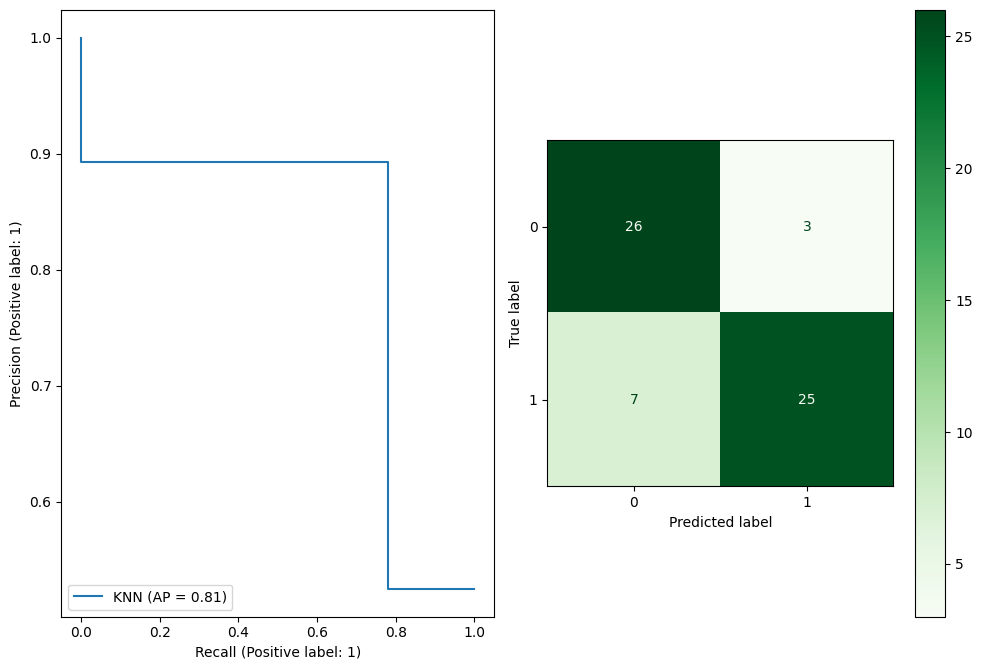

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("The test accuracy score of KNN  is: {:<.2f}% \n".format( accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test,y_pred))

# Creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm_p = ConfusionMatrixDisplay(confusion_matrix=cm)


#Creating a confusion matrix plot

fig = plt.figure(figsize=(10, 6.8),tight_layout=True)
gs = GridSpec(nrows=1, ncols=2)

# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_anchor('W')
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="KNN",ax=ax0)
# Second axes
ax1 = fig.add_subplot(gs[0, 1])
cm_p.plot(cmap='Greens',ax =ax1)

Tuning KNN

In [ ]:
acc =[]

for i in range(1, 50):

    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred)*100)


plt.figure(figsize =(11, 6.798))
plt.plot(range(1, 50), acc, color ='blue',linestyle ='dashed', marker ='o',markerfacecolor ='red', markersize = 10)
best_acc = max(acc)
k_val = acc.index(best_acc)
print("The best Accuracy achieved: {:<.2f}% is with K-value of: {:d}".format(best_acc, k_val))

plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')




The best Accuracy achieved: 88.05% is with K-value = 9
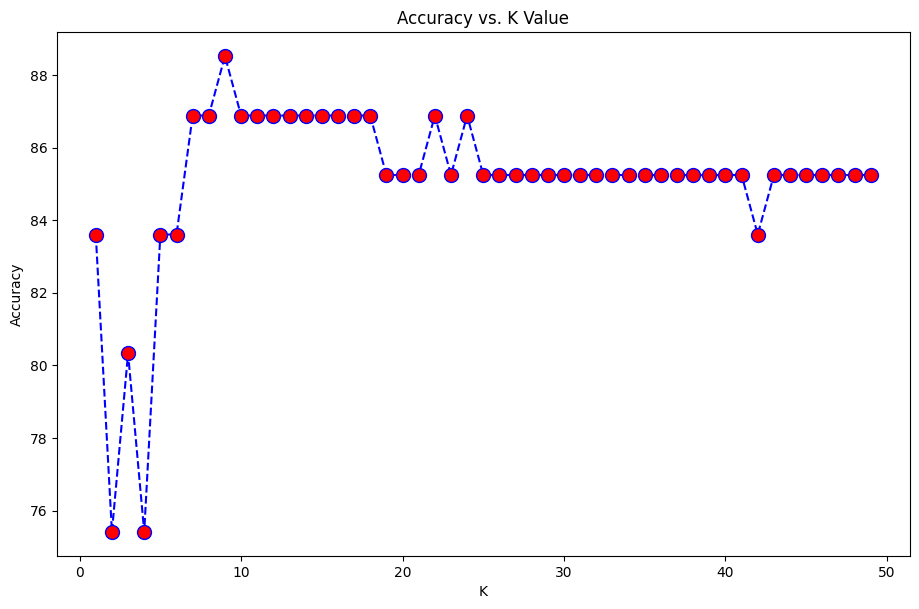

### New KNN model

The test accuracy score of Logistic Regression is: 88.52% 

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



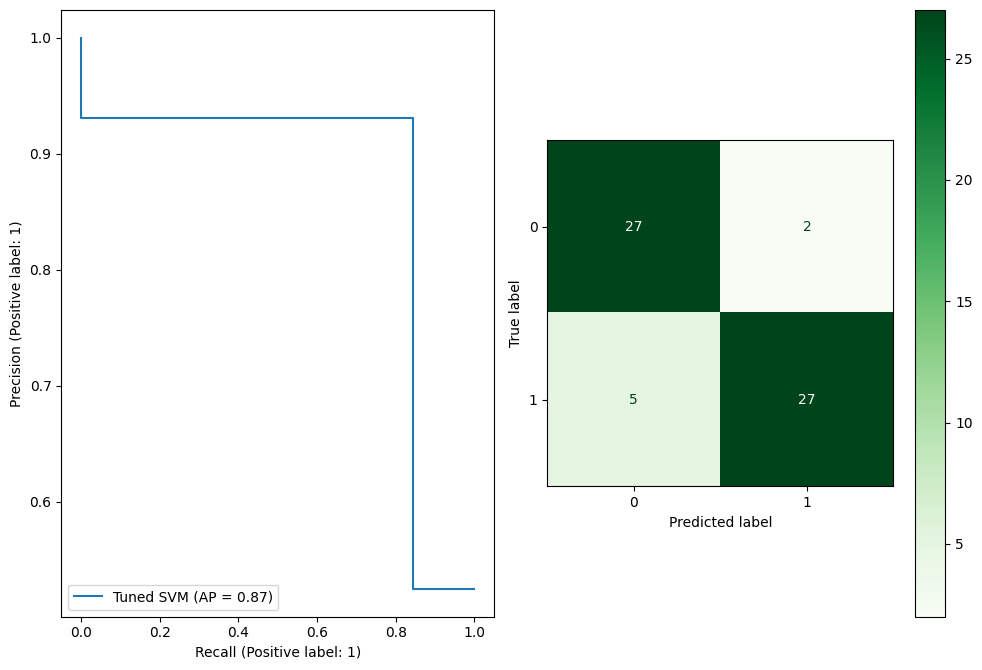

In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors = 9)
knn_tuned.fit(X_train,y_train)
y_pred = knn_tuned.predict(X_test)
print("The test accuracy score of Logistic Regression is: {:<.2f}% \n".format( accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test,y_pred))

# Creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm_p = ConfusionMatrixDisplay(confusion_matrix=cm)


#Creating a confusion matrix plot

fig = plt.figure(figsize=(10, 6.8),tight_layout=True)
gs = GridSpec(nrows=1, ncols=2)

# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_anchor('W')
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="Tuned SVM",ax=ax0)
# Second axes
ax1 = fig.add_subplot(gs[0, 1])
cm_p.plot(cmap='Greens',ax =ax1)

##Bagging  to improve accuracy
> What is bagging ?
>> Bagging also known as Bootstrap Aggregation is an ensemble method that is used to reduce variance within a noisy data set.


>>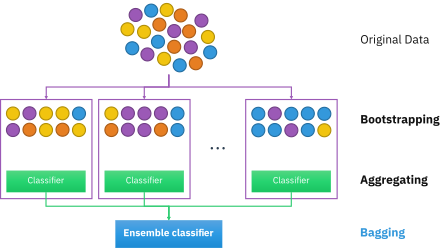

Bagging Decision tree

In [ ]:
from sklearn.ensemble import BaggingClassifier

#Bagging for Decison Trees
bc_dt = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=50, random_state=0)
bc_dt.fit(X_train,y_train)
y_pred_dt=bc_dt.predict(X_test)

print(classification_report(y_test,y_pred_dt))
print("The test accuracy score of Bagging of Decision Tree is: {:<.2f}% \n".format( accuracy_score(y_test, y_pred_dt)*100))


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

The test accuracy score of Bagging of Decision Tree is: 85.25% 



Bagging Random Forest

In [ ]:
#Bagging for Random Forest
bc_rfc = BaggingClassifier(estimator=RandomForestClassifier(),n_estimators=50, random_state=0)
bc_rfc.fit(X_train,y_train)
y_pred_rfc=bc_rfc.predict(X_test)

print(classification_report(y_test,y_pred_rfc))
print("The test accuracy score of Bagging of Random Forest Classifcation is: {:<.2f}% \n".format( accuracy_score(y_test, y_pred_rfc)*100))



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

The test accuracy score of Bagging of Random Forest Classifcation is: 86.89% 



Bagging Gradient Boost

In [ ]:
#Bagging for Gradient Boost
bc_gb = BaggingClassifier(estimator=GradientBoostingClassifier(),n_estimators=50, random_state=0)
bc_gb.fit(X_train,y_train)
y_pred_gb=bc_gb.predict(X_test)

print(classification_report(y_test,y_pred_gb))
print("The test accuracy score of Bagging of Gradient Boost Classifcation is: {:<.2f}% \n".format( accuracy_score(y_test, y_pred_gb)*100))


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

The test accuracy score of Bagging of Gradient Boost Classifcation is: 85.25% 



Bagging XG boost

In [ ]:
#Bagging for XGboost
bc_xgb = BaggingClassifier(estimator=XGBClassifier(),n_estimators=50, random_state=0)
bc_xgb.fit(X_train,y_train)
y_pred_xgb=bc_xgb.predict(X_test)

print(classification_report(y_test,y_pred_xgb))
print("The test accuracy score of Bagging of XGboost Classificatoin is: {:<.2f}% \n".format( accuracy_score(y_test, y_pred_xgb)*100))



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

The test accuracy score of Bagging of XGboost Classificatoin is: 83.61% 



Bagging Logistics Regression

In [ ]:
#Bagging for LogReg
bc_lr = BaggingClassifier(estimator=LogisticRegression(),n_estimators=50, random_state=0)
bc_lr.fit(X_train,y_train)
y_pred_lr=bc_lr.predict(X_test)

print(classification_report(y_test,y_pred_lr))
print("The test accuracy score of Bagging of Logistic Regrssion  is: {:<.2f}% \n".format( accuracy_score(y_test, y_pred_lr)*100))




/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

The test accuracy score of Bagging of Logistic Regrssion  is: 88.52% 



Bagging Linear kernel based Support Vector

In [ ]:
#Bagging for Support Vector
bc_svc_l = BaggingClassifier(estimator=SVC(kernel = "linear"),n_estimators=50, random_state=0)
bc_svc_l.fit(X_train,y_train)
y_pred_svc_l=bc_svc_l.predict(X_test)

print(classification_report(y_test,y_pred_svc_l))
print("The test accuracy score of Bagging of Linear Support Vector  Classifcation is: {:<.2f}% \n".format( accuracy_score(y_test, y_pred_svc)*100))



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

The test accuracy score of Bagging of Linear Support Vector  Classifcation is: 88.52% 



Bagging Sigmoidal Kernal based support vector

In [ ]:
#Bagging for Support Vector
bc_svc_s = BaggingClassifier(estimator=SVC(kernel = "sigmoid"),n_estimators=50, random_state=0)
bc_svc_s.fit(X_train,y_train)
y_pred_svc_s=bc_svc_s.predict(X_test)

print(classification_report(y_test,y_pred_svc_s))
print("The test accuracy score of Bagging of sigmoidal Support Vector  Classifcation is: {:<.2f}% \n".format( accuracy_score(y_test, y_pred_svc_s)*100))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.92      0.72      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61

The test accuracy score of Bagging of sigmoidal Support Vector  Classifcation is: 81.97% 



Bagging RBF kernal bases support Vector

In [ ]:
#Bagging for Support Vector
bc_svc_r = BaggingClassifier(estimator=SVC(kernel = "rbf"),n_estimators=50, random_state=0)
bc_svc_r.fit(X_train,y_train)
y_pred_svc_r=bc_svc_r.predict(X_test)

print(classification_report(y_test,y_pred_svc_r))
print("The test accuracy score of Bagging of rbf Support Vector Classifcation is: {:<.2f}% \n".format( accuracy_score(y_test, y_pred_svc_r)*100))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

The test accuracy score of Bagging of rbf Support Vector Classifcation is: 85.25% 



Bagging KNN

In [ ]:
#Bagging for KNN
bc_knn = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors =11),n_estimators=50, random_state=0)
bc_knn.fit(X_train,y_train)
y_pred_knn=bc_knn.predict(X_test)

print(classification_report(y_test,y_pred_knn))
print("The test accuracy score of Bagging of KNN Classifcation is: {:<.2f}% \n".format( accuracy_score(y_test, y_pred_knn)*100))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

The test accuracy score of Bagging of KNN Classifcation is: 88.52% 



##Conclusion

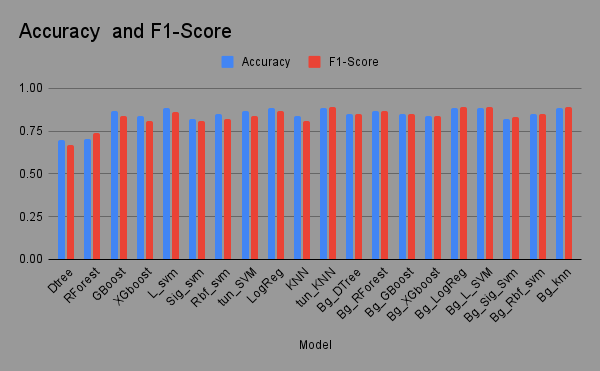



> Various models were employed in order to predict the risk of a heart attack in this data set. Surprisingly, most relatively accurate methods produced robust models with good predictions. In terms of metrics for evaluating the models, Accuracy and F1 score were chosen since accuracy is the goal of each model whereas F1 score indicates the prowess of that model in terms of bias and variance.

> In terms of the best model, a few models achieved high accuracy with good F1 scores: Bagged linear kernel-based SVM, bagged logistic Regression, and bagged and tuned KNN. They all shared an accuracy value of 88.52% and an F1 score of .89. It appears that 88.52% is the highest accuracy that is achievable using the current data set and models.

>Considering improvements there are a lot of aspects that can be addressed in terms of improving accuracy. During data preprocessing the outliers were not removed but log-transformed, removing the outliers can result in a higher accuracy value. Another aspect that can be considered is feature removal, feature selection, and extraction were not performed since the data set had more than 2n values when compared to features. As seen through various feature extraction methods it appeared that many of the features such as chest pain type, fasting blood sugar, etc did not contribute much in terms of output.
It was interesting to observe that simplistic models such as knn, svm, and logistic regression outperform complicated methods such as XGboost, ensemble methods such as random forest, etc. Implementing more complicated models such as deep neural networks, multilayer perceptrons, etc is a good direction to move this project to explore the predictive prowess of various methods.


###sources
>* https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

>* https://www.cdc.gov/

>* Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
>* @misc{chollet2015keras,
  title={Keras},
  author={Chollet, Fran\c{c}ois and others},
  year={2015},
  howpublished={\url{https://keras.io}},
}

